# Libraries & Settings

In [128]:
import os
from IPython.display import display #display more than one dataframe from the same code block.
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px

# Split training and test data
from sklearn.model_selection import train_test_split

# Find relevant features
from sklearn.feature_selection import mutual_info_regression

# Empty values
from sklearn.impute import SimpleImputer

# Transform categorical data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import MEstimateEncoder

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Build Pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
#from sklearn.multiclass import OneVsRestClassifier # To use a binary classifier with the OvR strategy to implement a multiclass classifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Measure performance - Classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Measure performance with CV
from sklearn.model_selection import cross_val_score # returns the score of the performance measurement
from sklearn.model_selection import cross_val_predict # returns the values predict by the value

# ML Explainability
import eli5 as el5
from eli5.sklearn import PermutationImportance
#from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
#import shap

# Fine-tune model
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Save models
import joblib as jbl
#from joblib import dump, load
#import pickle

In [2]:
#pip install category_encoders
#!pip install eli5
#!pip install xgboost

In [3]:
pd.set_option('display.max_columns', None)
#pd.reset_option('max_columns')

#pd.set_option('display.max_colwidth', None)
#pd.reset_option('max_colwidth')

#pd.set_option('max_rows', None)
#pd.reset_option('max_rows')

#pd.set_option('precision', 2)
#pd.reset_option('precision')

# Look at the big picture

## Frame the Problem

Predict if a passenger survived the sinking of the Titanic or not. For each row in the test set, you must predict a 0 or 1 value for the variable. This means it has to be a classification problem (output is binary): just 1 or 0.

## Select a Performance Measure

Your score is the percentage of passengers you correctly predict: **Accuracy**.

## List and check the assumptions

- People with more family in the ship have more probability of survived because they help each other.
- It can be possible that the women (sex) and children (lower age) were more protected than men. One way to measure this is by the proportion of women and children before and after the incident, since the absolute number of people descended.

# Get the Data

In [4]:
os.getcwd()

'C:\\Users\\matia\\OneDrive\\Documentos\\Study\\Scripts\\01_Classification_Titanic'

In [5]:
# https://www.kaggle.com/competitions/titanic/overview
DF = pd.read_csv("C:\\Users\\matia\\OneDrive\\Documentos\\Study\\Scripts\\01_Classification_Titanic\\titanic\\train.csv", header = 0)

## Take a Quick Look at the Data Structure

In [6]:
DF.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
DF.describe(include = [np.number])

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

* 38% of the peopleo survived.
* The majority of people are from the 3° class, since the 50 percentile (median) is 3.0 in the "Pclass" feature.
* The mean and median of feature "Age" is 29.7 and 28.0, which indicates the people in general were young.
* The fact that "SibSp" and "Parch" have 75 percentiles of 1.0 and 0.0, respectively, means that in general the people traveled alone.
* Comparing the mean, 75 percentile and max of "Fare" leads that a few tickets were very expensive. 

In [9]:
DF.describe(include = [object])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [10]:
DF['Sex'].value_counts(normalize = True)
# The majority of passengers were male.

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

 
 

Sex
['male' 'female']

male      577
female    314
Name: Sex, dtype: int64

 
 

Ticket
[

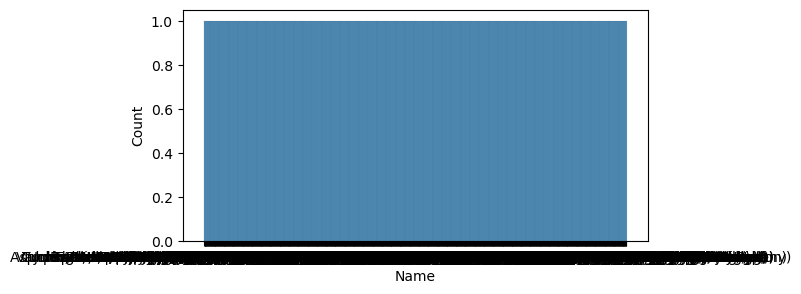

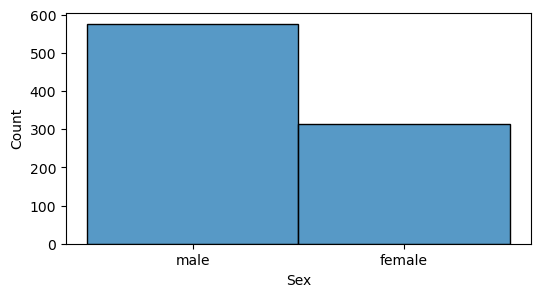

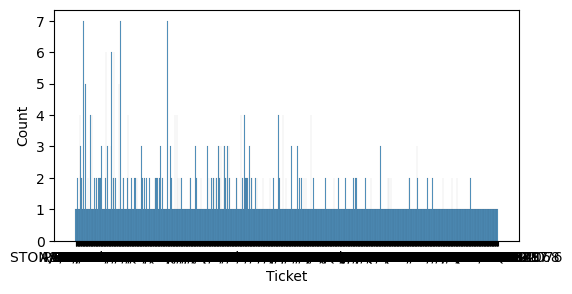

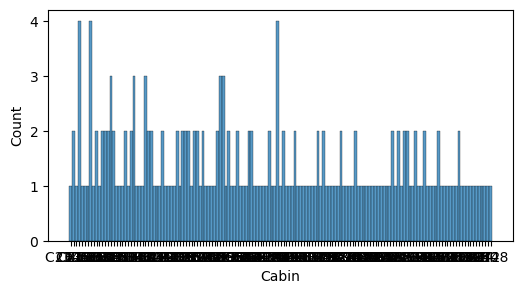

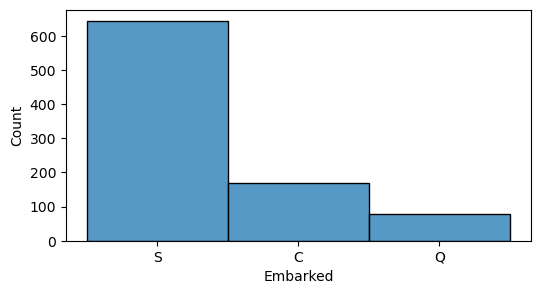

In [11]:
# Explore the unique values of the object features
features_obj = []

for i in DF.columns:
    if DF[i].dtype == 'object':
        print(i)
        features_obj.append(i)
        print(DF[i].unique()[:10])
        print()
        print(DF[i].value_counts(ascending = False))
        fig, axes = plt.subplots(figsize=(6, 3))
        sns.histplot(x = DF[i])
        print("\n \n \n")

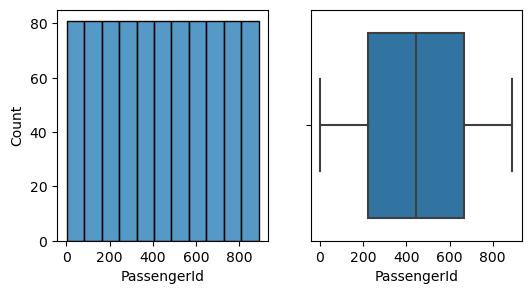

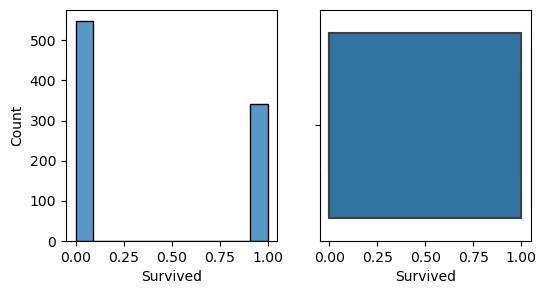

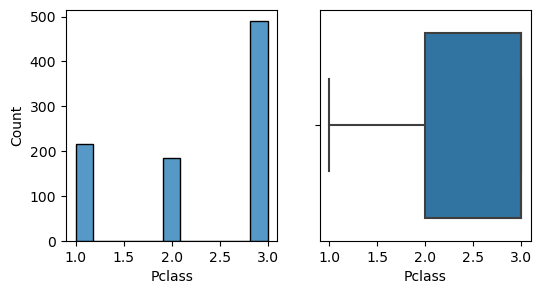

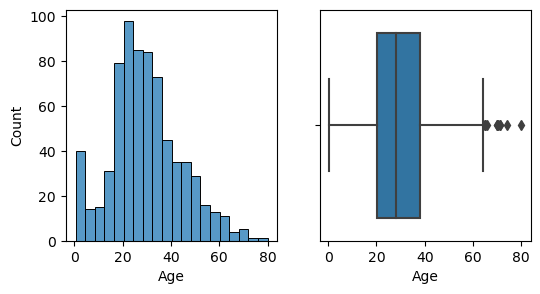

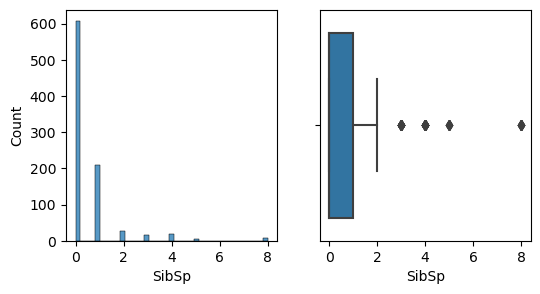

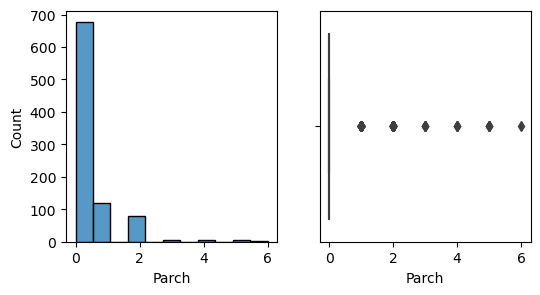

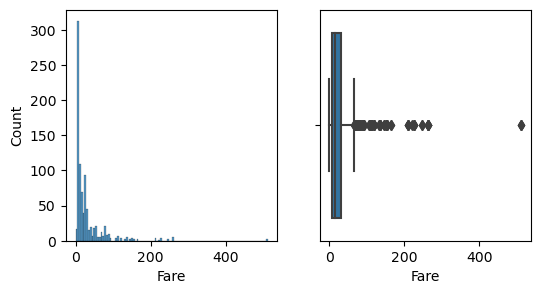

In [12]:
# Explore the distribution of the numerical features
features_num = []

for i in DF.columns:
    if DF[i].dtype != 'object':
        features_num.append(i)
        fig, axes = plt.subplots(1, 2, figsize=(6, 3))
        sns.histplot(x = DF[i], ax = axes[0])
        sns.boxplot(x = DF[i],  ax = axes[1])

In [13]:
features_num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
features_obj

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

## Create a Test Set

In [15]:
y = DF['Survived']
X = DF.drop(['Survived'], axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, random_state = 42)

DF_train = X_train.join(y_train)

In [16]:
features_num.remove('Survived')

In [17]:
print(features_num)
print(features_obj)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# Explore the data

## Study each attribute and its characteristics

In [18]:
# Percentage of data lost
X_train[['Age','Cabin','Embarked']].isnull().sum() / X_train[['Age','Cabin','Embarked']].isnull().count() *100

Age         19.662921
Cabin       77.668539
Embarked     0.280899
dtype: float64

In [19]:
# Explore a few line from the features that have NA values.
X_train[['Age','Cabin','Embarked']].loc[X_train['Age'].isna() | X_train['Cabin'].isna() | X_train['Embarked'].isna()]

Age Cabin Embarked
733  23.0   NaN        S
382  32.0   NaN        S
704  26.0   NaN        S
813   6.0   NaN        S
361  29.0   NaN        C
..    ...   ...      ...
20   35.0   NaN        S
71   16.0   NaN        S
106  21.0   NaN        S
270   NaN   NaN        S
860  41.0   NaN        S

[569 rows x 3 columns]

## Visualizing Data

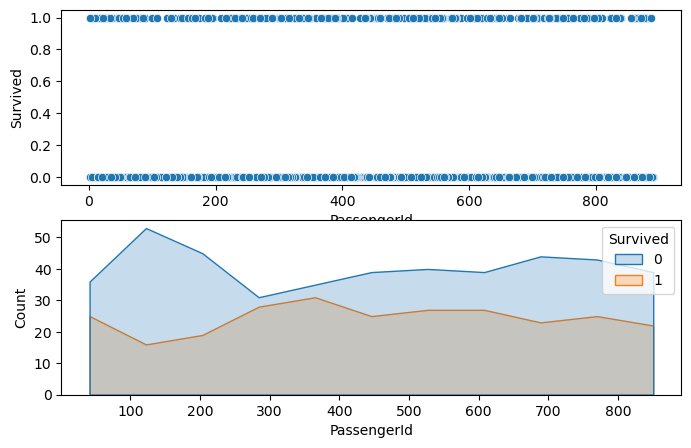

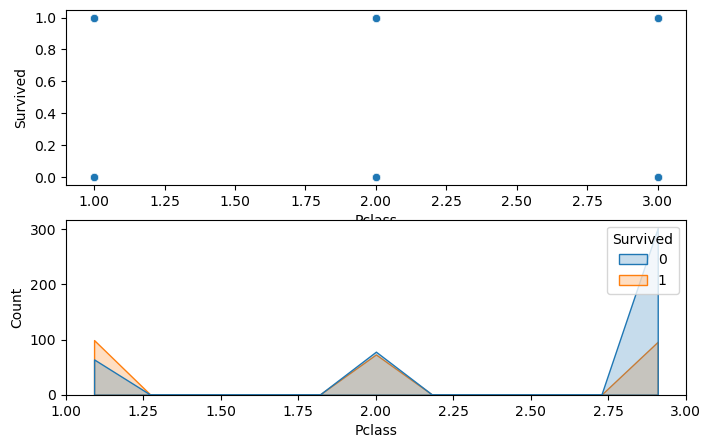

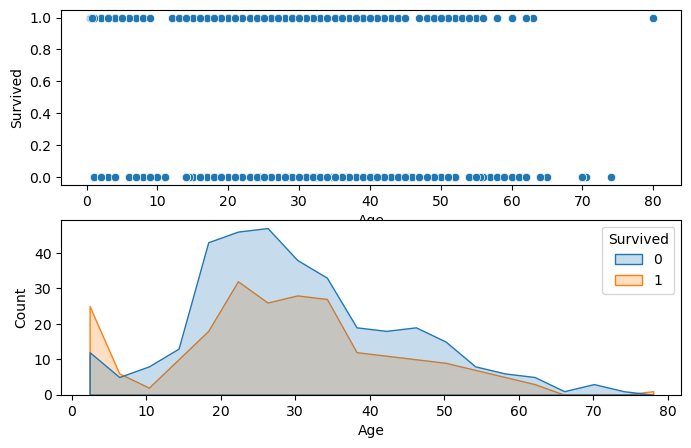

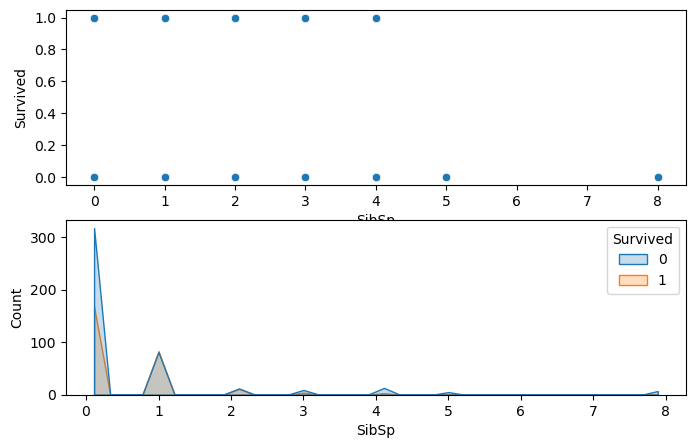

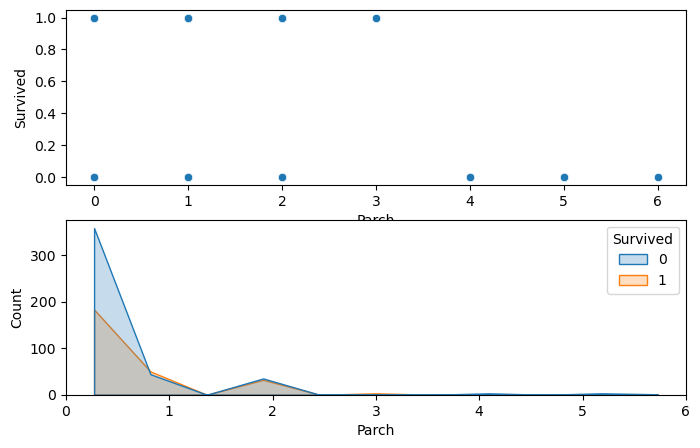

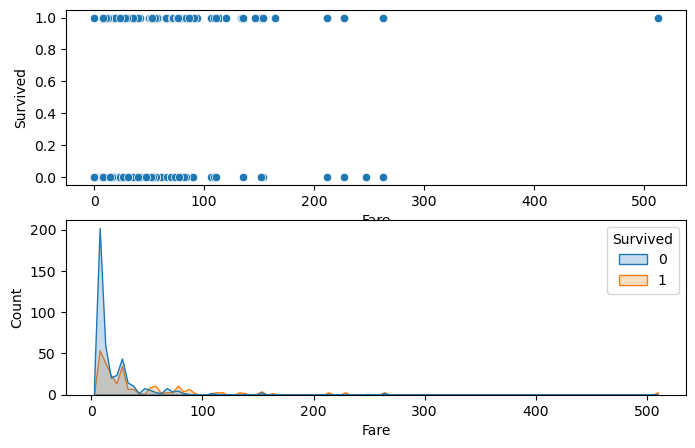

In [20]:
# The following graphs relate several variables to the feature "Survived".
for i in features_num:
    fig, axes = plt.subplots(2, 1, figsize = (8,5))
    sns.scatterplot(data = DF_train, x = i, y = 'Survived', ax = axes[0])
    sns.histplot(data = DF_train, x = i, hue = 'Survived', element = 'poly', ax = axes[1])

Although in the scatter plots "Feature_i" vs "Survived" seems not to be any relation, in some distribution plots appears some proportions highlighted next:
- In the "Pclass" vs "Survived" plot, the people from the 1° class survived more than the 3° class, in absolute and relative numbers (~50%).
- In the "Age" vs "Survived" plot, people between 0 and 8 years old survived more than the rest, in relatives terms (~50%). People above 64 died almost all.
- In the "SibSp" vs "Survived" and "Parch" vs "Survived" plots, when the value is between 1 and 2 it appears to have a more survived proportion, around 50%.

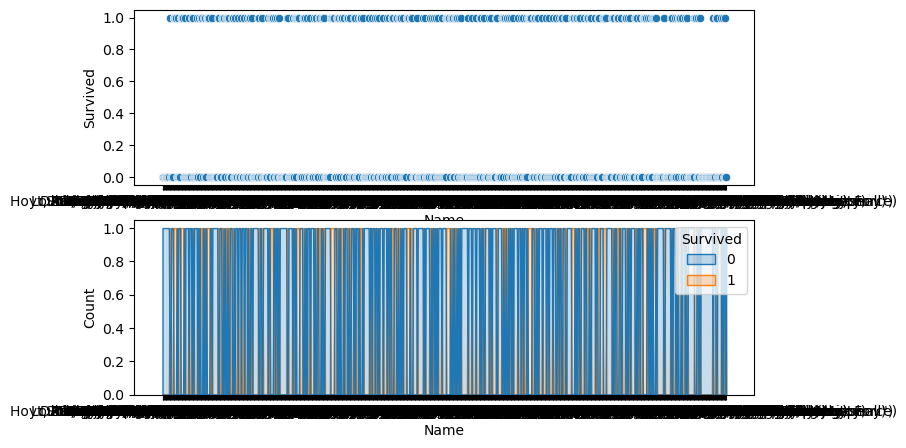

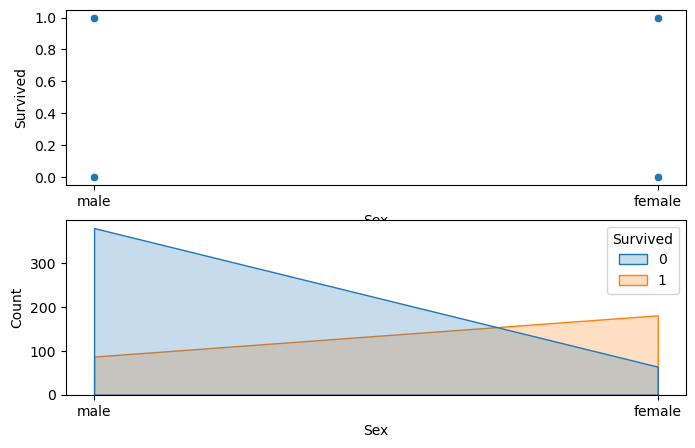

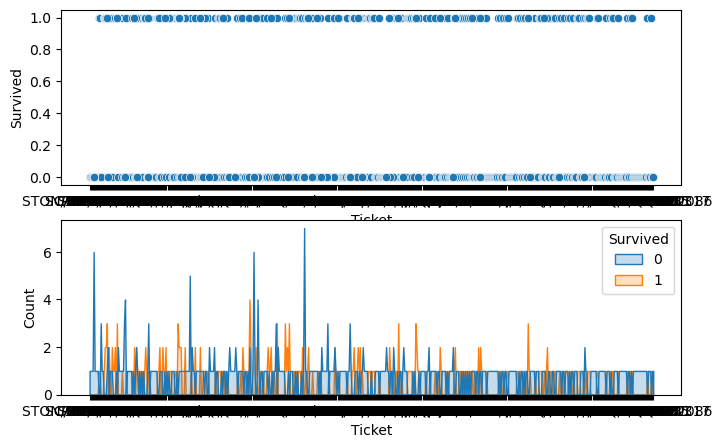

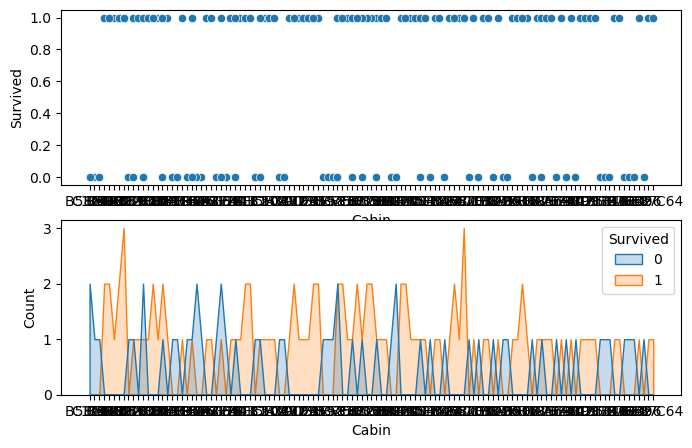

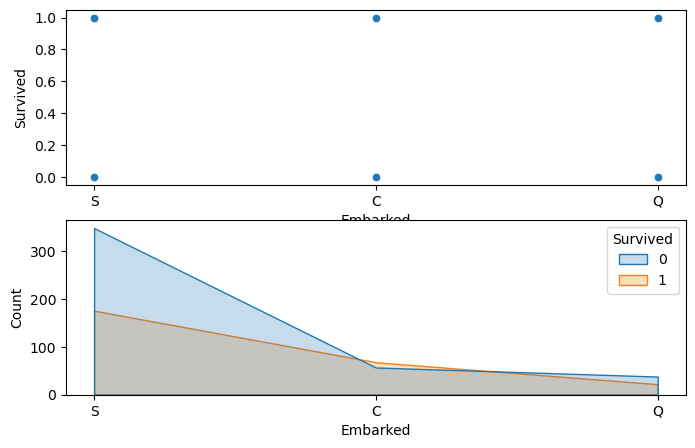

In [21]:
for i in features_obj:
    fig, axes = plt.subplots(2, 1, figsize = (8,5))
    sns.scatterplot(data = DF_train, x = i, y = 'Survived', ax = axes[0])
    sns.histplot(data = DF_train, x = i, hue = 'Survived', element = 'poly', ax = axes[1])

- In "Sex" vs "Survived" plot, a larger proportion of females survived compared to males.
- In "Embarked" vs "Survived" plot, people from "C" have a higher survival rate (~50%).

## Looking for Correlations and Mutual Information

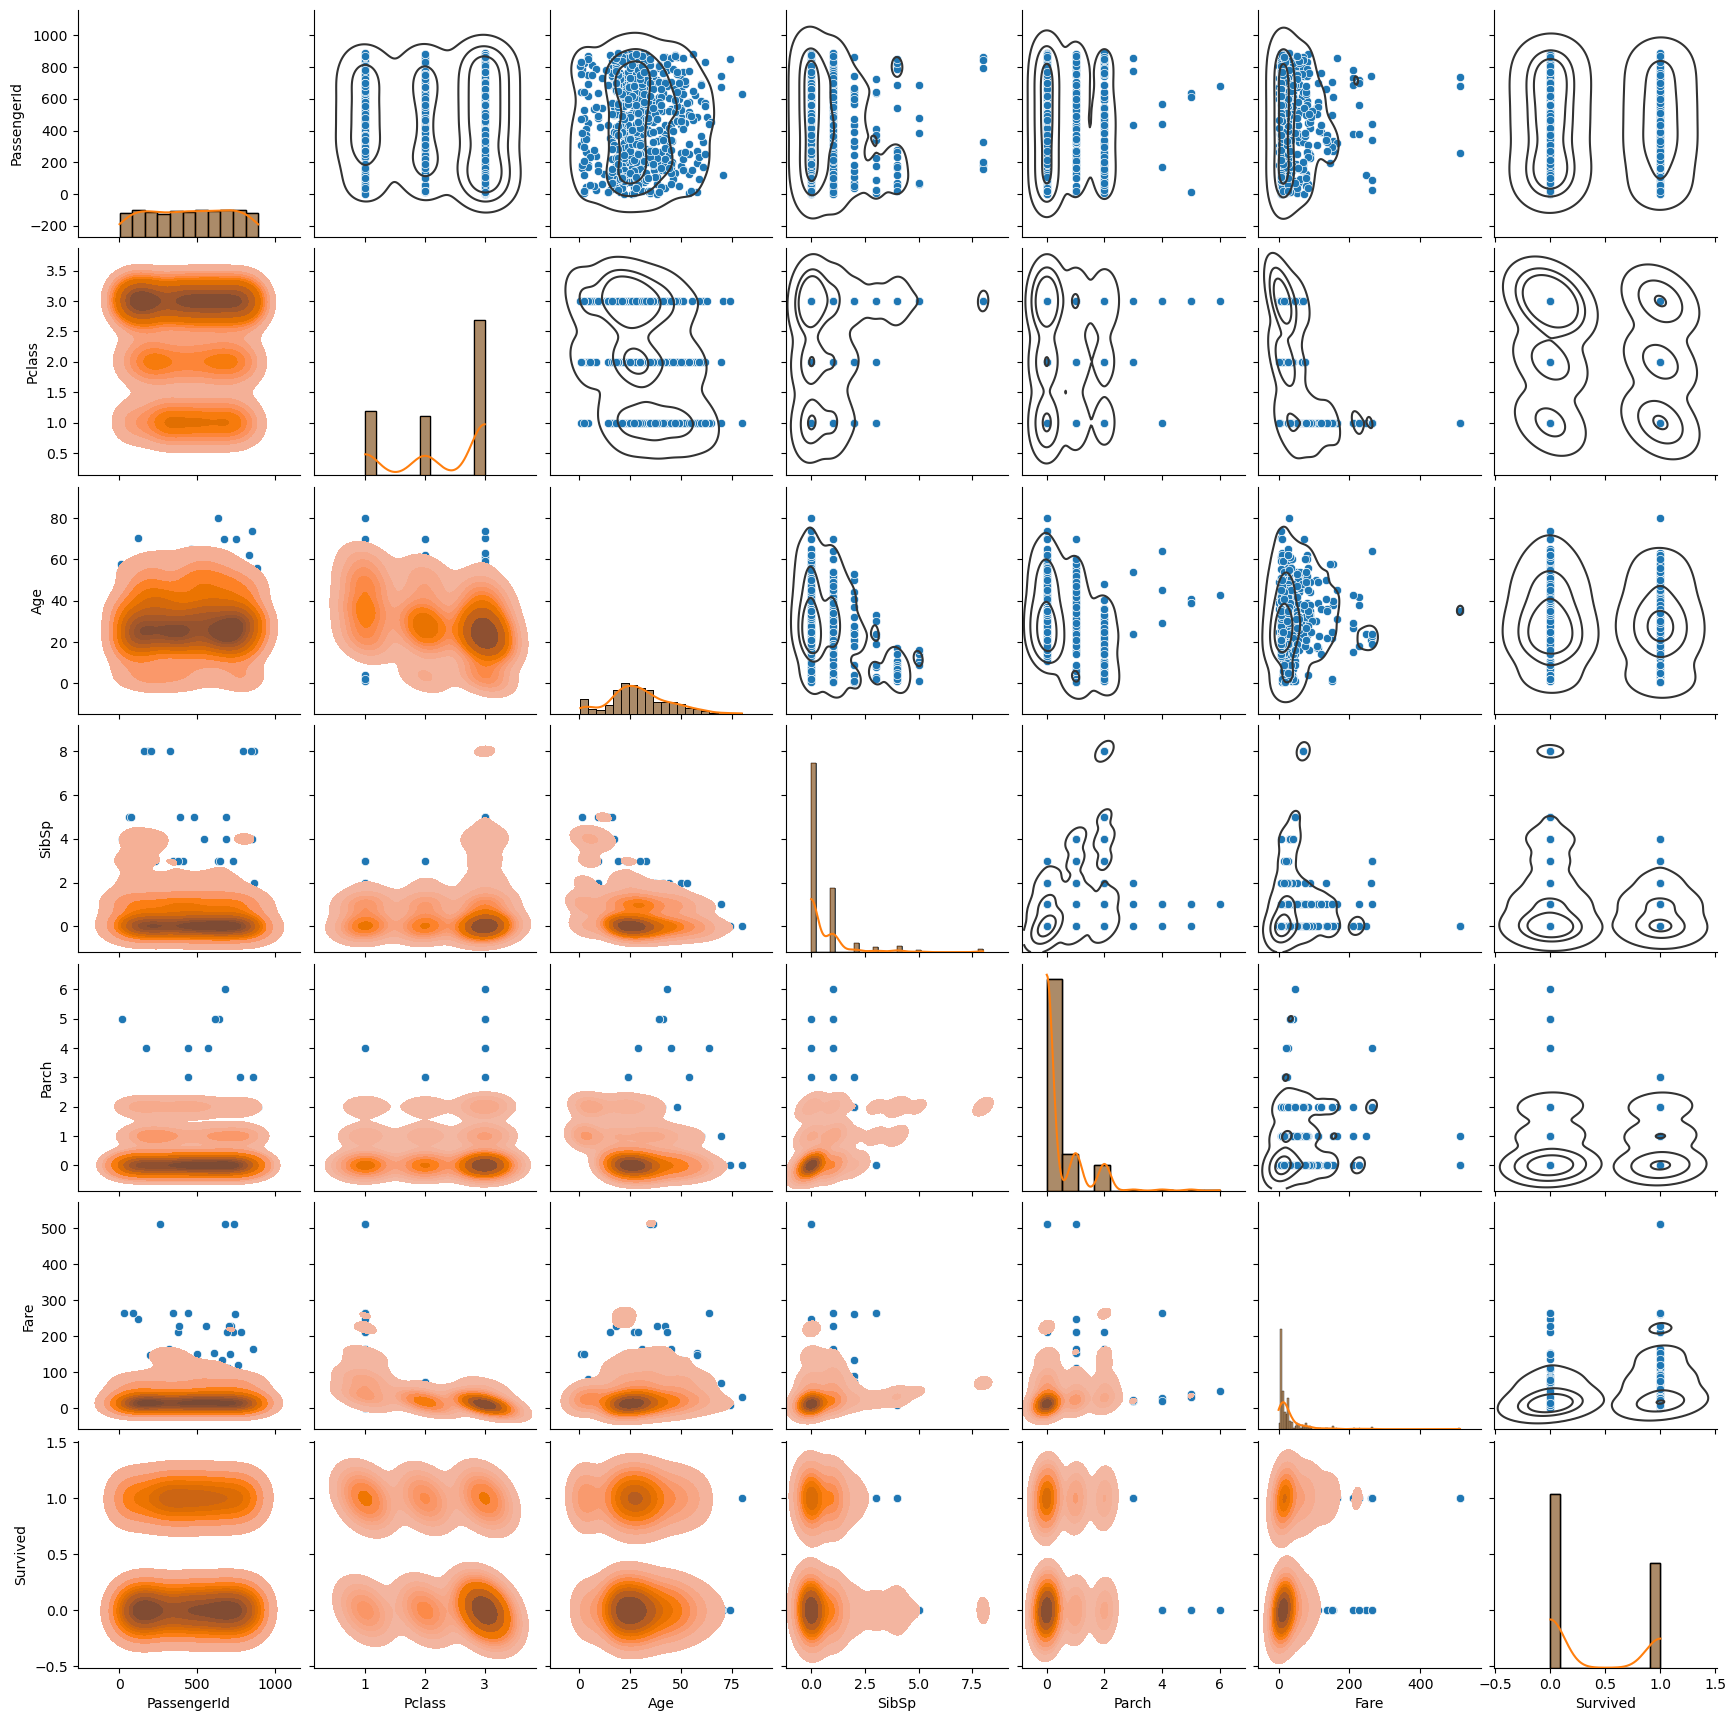

In [22]:
g = sns.pairplot(DF_train)
g.map_lower(sns.kdeplot, fill = True)
g.map_diag(sns.histplot, kde = True)
g.map_upper(sns.kdeplot, levels=4, color=".2")

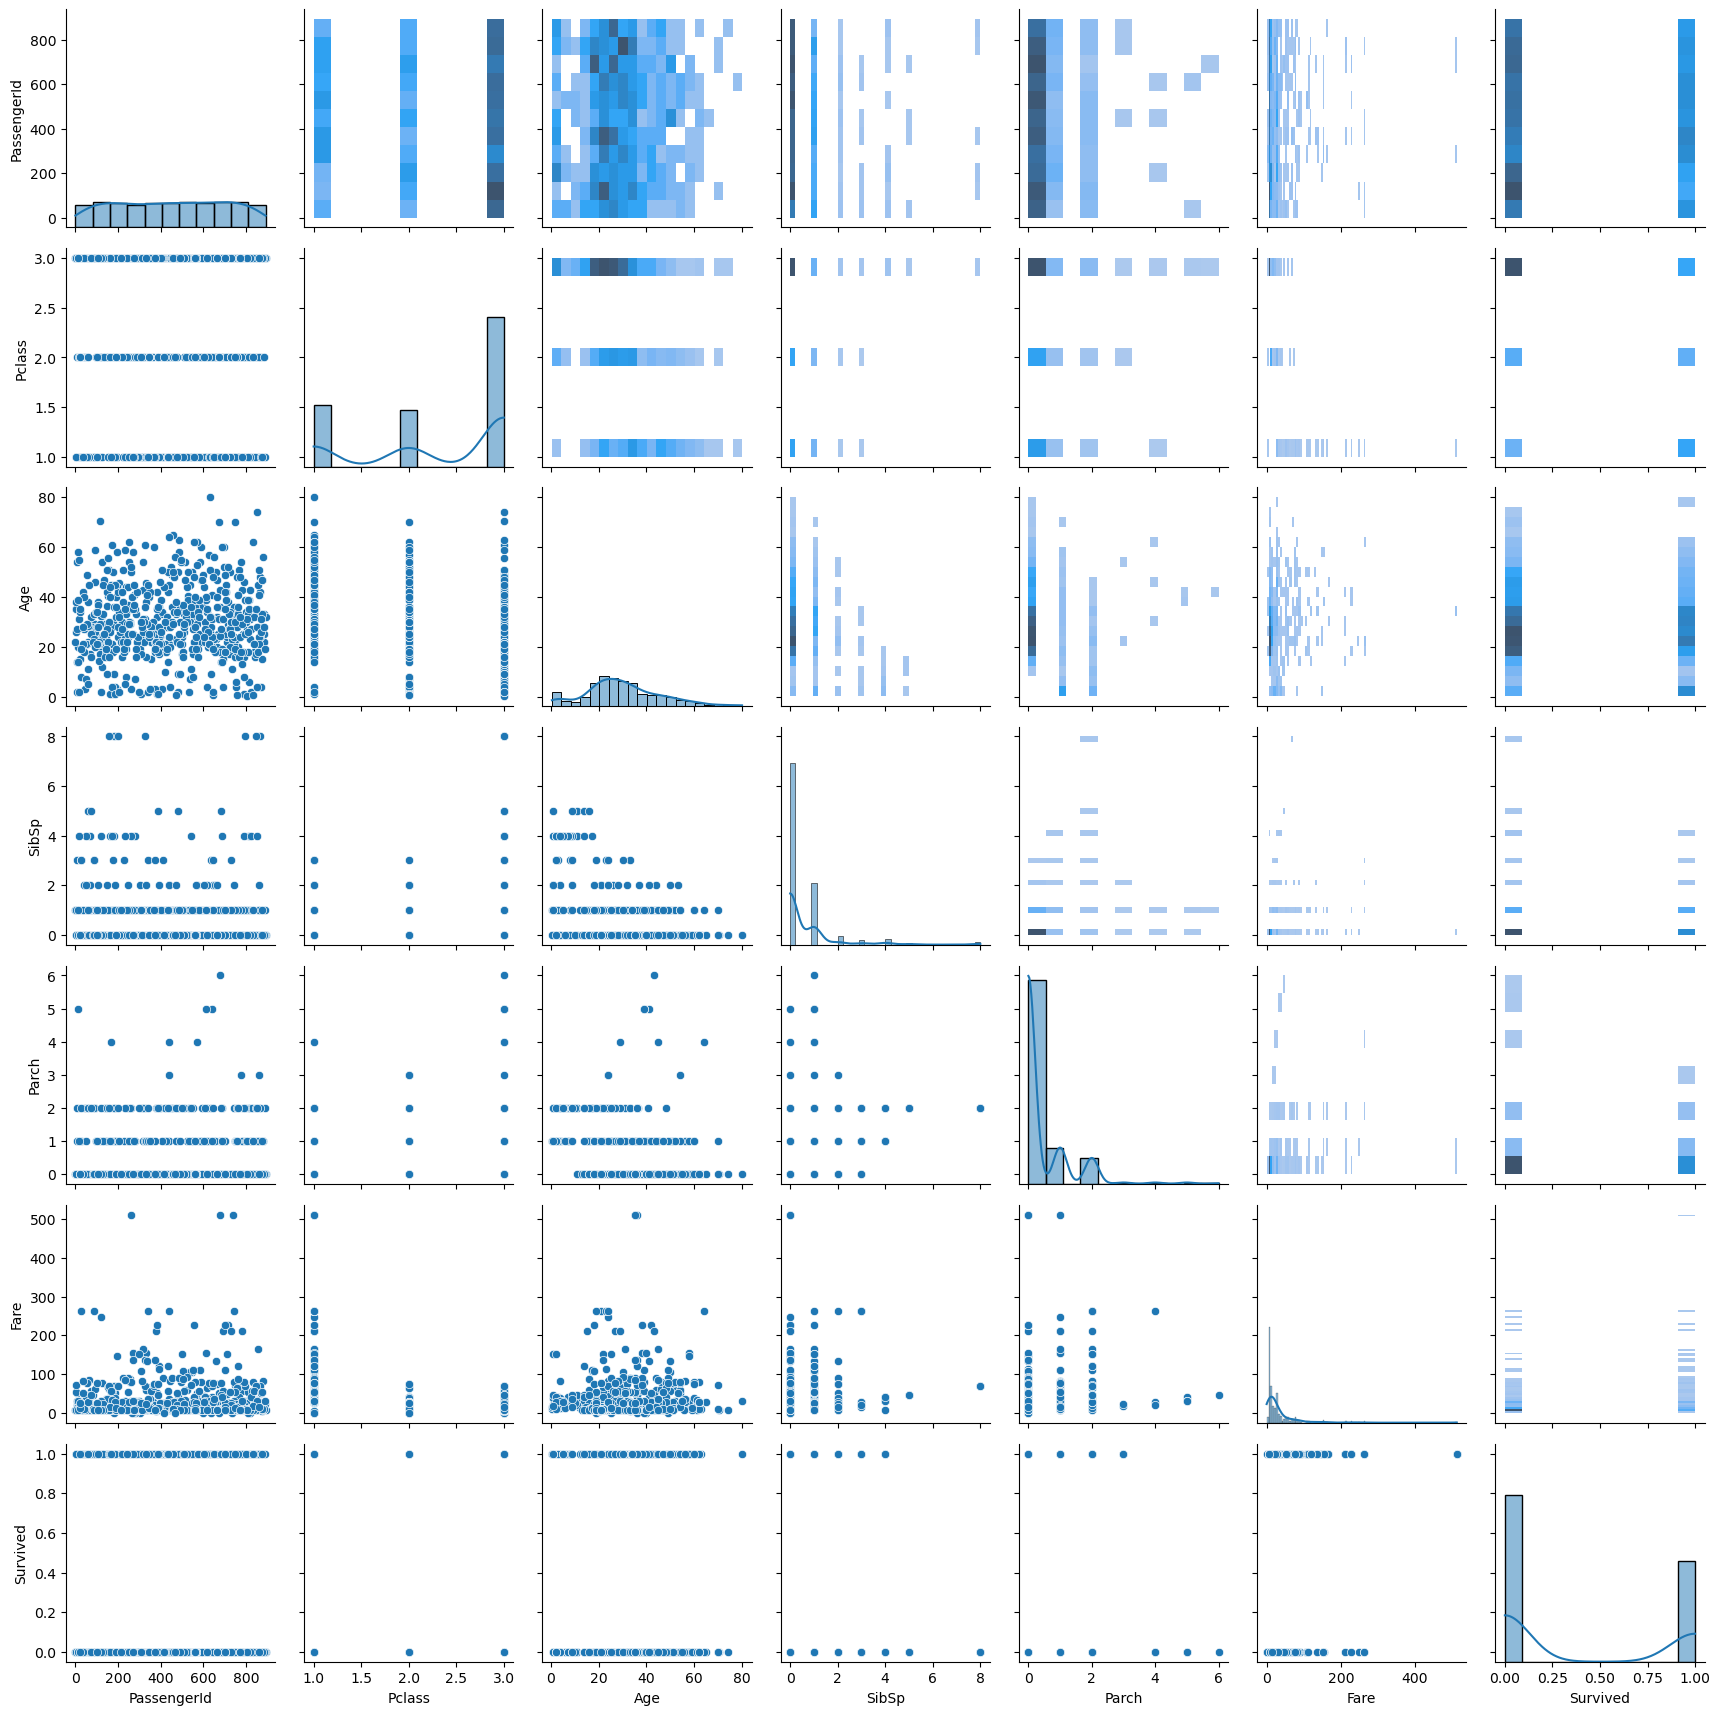

In [23]:
g = sns.PairGrid(DF_train)
g.map_upper(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde = True)

In [24]:
DF_train.cov(numeric_only = True)

PassengerId     Pclass         Age      SibSp     Parch  \
PassengerId  65911.023671  -9.775133  122.284714 -20.907754 -0.044063   
Pclass          -9.775133   0.679939   -4.288674   0.084329  0.008277   
Age            122.284714  -4.288674  210.251707  -4.501273 -2.492052   
SibSp          -20.907754   0.084329   -4.501273   1.383927  0.410112   
Parch           -0.044063   0.008277   -2.492052   0.410112  0.626740   
Fare           340.450549 -23.431910   71.580633   9.354652  9.141094   
Survived         2.486836  -0.128629   -0.425381  -0.027150  0.030057   

                    Fare  Survived  
PassengerId   340.450549  2.486836  
Pclass        -23.431910 -0.128629  
Age            71.580633 -0.425381  
SibSp           9.354652 -0.027150  
Parch           9.141094  0.030057  
Fare         2700.831981  6.214380  
Survived        6.214380  0.235054

<Axes: >

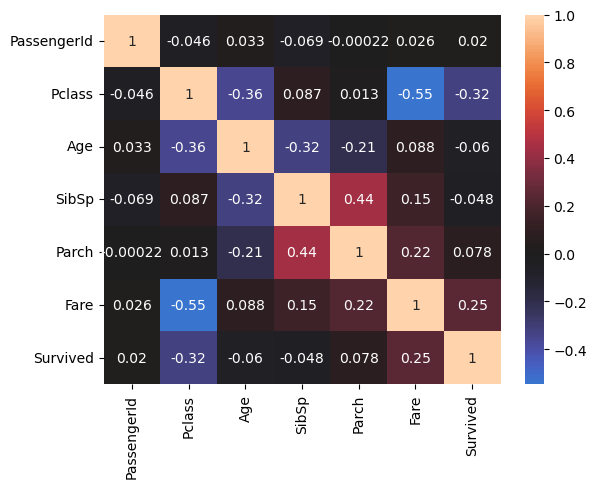

In [25]:
corr_matrix = DF_train.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot = True, cmap = 'icefire', center = 0.0) #coolwarm, icefire, Spectral | divergent color palettes

In [26]:
corr_matrix['Survived'].abs().sort_values(ascending=False)

Survived       1.000000
Pclass         0.321750
Fare           0.246641
Parch          0.078311
Age            0.059695
SibSp          0.047602
PassengerId    0.019979
Name: Survived, dtype: float64

Considering just the numerical features, "Pclass" and "Fare" have more correlation to the target "Survived".

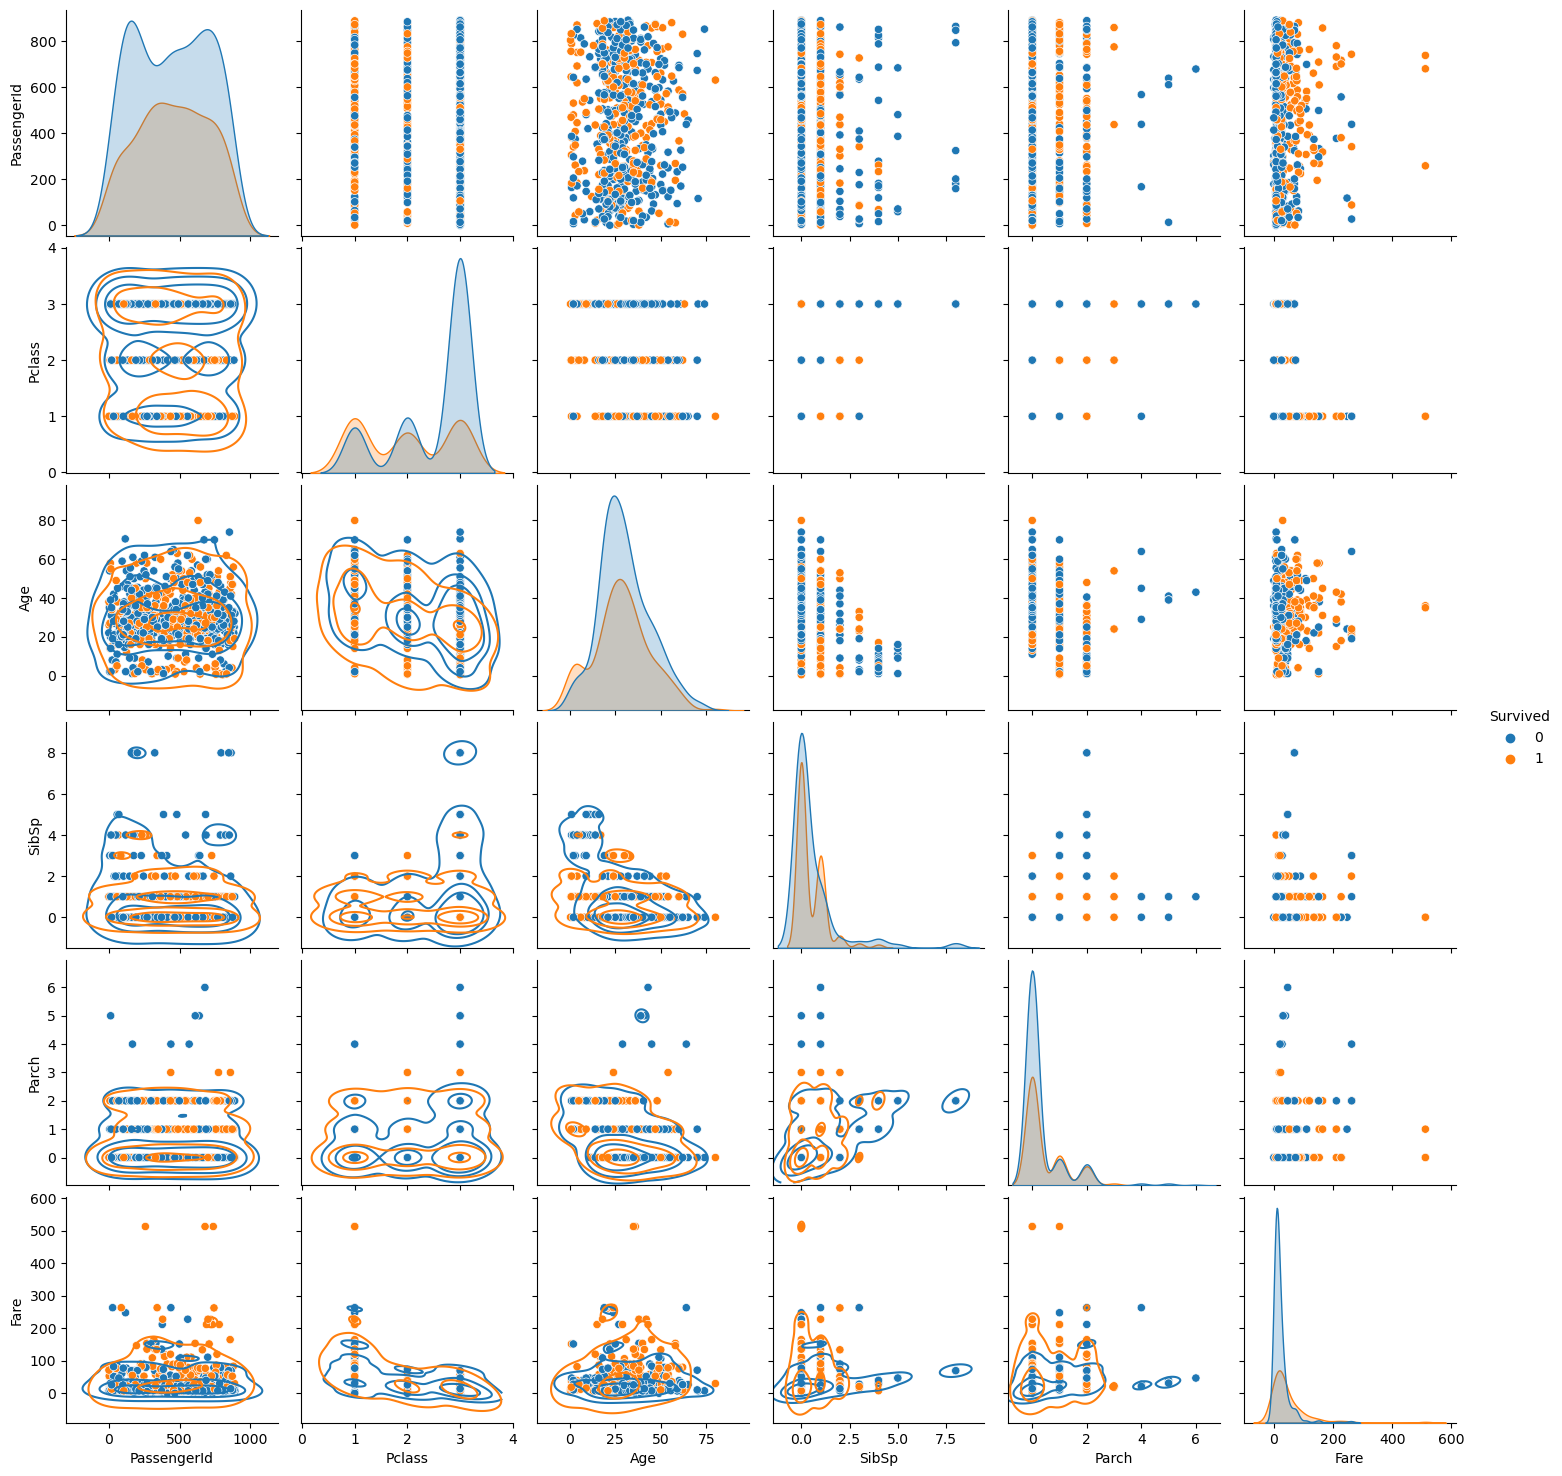

In [27]:
# Redo the previous plot overlaying the results for each "Survived" value.
g = sns.pairplot(DF_train, hue = 'Survived')
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [28]:
# Function that helps calculate the mutual information score.
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI_scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [29]:
# mutual_info_regression doesn't work with NA values. So in this stage, i'll just drop them.
X_mi = DF_train[features_num].dropna(axis=0)
y_mi = DF_train['Survived'][X_mi.index]

mi_scores = make_mi_scores(X_mi, y_mi)
mi_scores

Fare           0.099925
Pclass         0.068715
Parch          0.039270
SibSp          0.009733
Age            0.009349
PassengerId    0.000000
Name: MI_scores, dtype: float64

<Axes: >

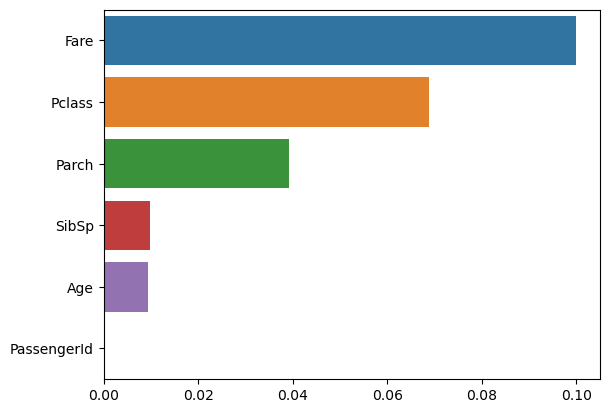

In [30]:
sns.barplot(y = mi_scores.index, x = mi_scores.values)

Just considering the numerical features, this methods shows that the most relevant variable is "Fare", follow by "Pclass" and "Parch". This is similar to the results using correlation, so by now it's sure to say that "Pclass" and "Fare" are relevant features to predict the survival chance.

It will be necessary to redo the *correlation matrix* and the *mutual information* score once the categotical features are transformed into numerical values.

# Prepare the Data

## Data Cleaning

In [31]:
# Since "Fare" has a long tail with a few observations, let's identify how many observations are going to be lose if we stablish a threshold.
threshold = -1
for i in range(100, 500, 50):
    obs_lost = DF_train['Fare'].loc[DF_train['Fare'] > i].count()
    tol_col = DF_train['Fare'].count()
    perc_lost = obs_lost / tol_col
    
    print('Threshold: ' + str(i))
    print('Percentage lost: '+ str(perc_lost * 100))
    print('Number observations lost: ' + str(obs_lost))
    
    if (perc_lost <= 0.05) and (threshold == -1):
        threshold = i
    print()

Threshold: 100
Percentage lost: 6.179775280898876
Number observations lost: 44

Threshold: 150
Percentage lost: 3.651685393258427
Number observations lost: 26

Threshold: 200
Percentage lost: 2.387640449438202
Number observations lost: 17

Threshold: 250
Percentage lost: 1.1235955056179776
Number observations lost: 8

Threshold: 300
Percentage lost: 0.42134831460674155
Number observations lost: 3

Threshold: 350
Percentage lost: 0.42134831460674155
Number observations lost: 3

Threshold: 400
Percentage lost: 0.42134831460674155
Number observations lost: 3

Threshold: 450
Percentage lost: 0.42134831460674155
Number observations lost: 3



In [32]:
# Remove outlier from "Fare"
DF_train = DF_train.loc[DF_train['Fare'] <= threshold]
DF_train = DF_train.reset_index(drop = True)

In [33]:
threshold

150

In [34]:
# Fill the NA... "Age" (numeric) and "Embarked" (text)
DF_train[['Age','Embarked']].isna().sum()

Age         139
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

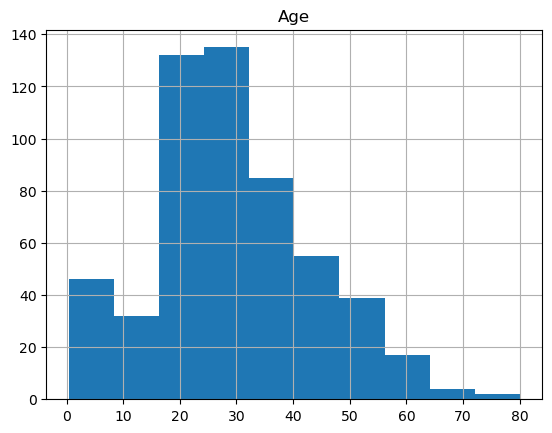

In [35]:
DF_train[['Age']].hist()

<Axes: >

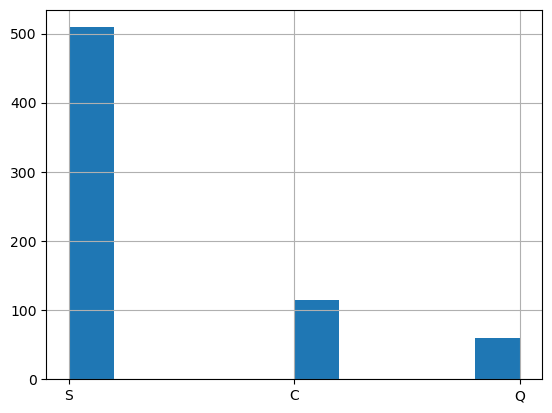

In [36]:
DF_train['Embarked'].hist()

In [37]:
# Fill the feature "Age" with the mean and indicate in which row the data was missing.
# Save the results in a new column "_fill" and "_was_missing"
DF_train['Age_was_missing'] = DF_train['Age'].isnull().astype(int)

my_imputer01 = SimpleImputer(strategy = 'mean')
DF_train['Age_fill'] = pd.DataFrame(my_imputer01.fit_transform(DF_train['Age'].array.reshape(-1, 1)), columns = ['Age'])

In [38]:
DF_train[['Age','Age_fill', 'Age_was_missing']]

Age   Age_fill  Age_was_missing
0    45.5  45.500000                0
1    23.0  23.000000                0
2    32.0  32.000000                0
3    26.0  26.000000                0
4     6.0   6.000000                0
..    ...        ...              ...
681  21.0  21.000000                0
682   NaN  29.466947                1
683  41.0  41.000000                0
684  14.0  14.000000                0
685  21.0  21.000000                0

[686 rows x 3 columns]

In [39]:
# Fill the feature "Embarked" with the most frequent value and indicate in which row the data was missing.
# Save the results in a new column "_fill" and "_was_missing"
DF_train['Embarked_was_missing'] = DF_train['Embarked'].isnull().astype(int)

my_imputer02 = SimpleImputer(strategy = 'most_frequent')
DF_train['Embarked_fill'] = pd.DataFrame(my_imputer02.fit_transform(DF_train['Embarked'].array.reshape(-1, 1)), columns = ['Embarked'])

In [40]:
DF_train[['Embarked','Embarked_fill','Embarked_was_missing']].isna().sum()

Embarked                2
Embarked_fill           0
Embarked_was_missing    0
dtype: int64

## Feature selection

In [41]:
# Drop feature "Cabin" becasuse it has to many empty values and the few left apperrently doesn't have correlation with the target.
DF_train = DF_train.drop(['Cabin'] , axis = 1)

In [42]:
# Drop feature "Name" because all row are different.
DF_train = DF_train.drop(['Name'] , axis = 1)

In [43]:
# Drop feature "PassengerId" because it is just an index.
DF_train = DF_train.drop(['PassengerId'] , axis = 1)

In [44]:
# Drop feature "Ticket" because almost all observations are different and doesn't show any type of codependece with the target.
DF_train = DF_train.drop(['Ticket'] , axis = 1)

In [45]:
DF_train

Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Survived  \
0         1    male  45.5      0      0   28.5000        S         0   
1         2    male  23.0      0      0   13.0000        S         0   
2         3    male  32.0      0      0    7.9250        S         0   
3         3    male  26.0      1      0    7.8542        S         0   
4         3  female   6.0      4      2   31.2750        S         0   
..      ...     ...   ...    ...    ...       ...      ...       ...   
681       3  female  21.0      0      0    7.6500        S         1   
682       1    male   NaN      0      0   31.0000        S         0   
683       3    male  41.0      2      0   14.1083        S         0   
684       1  female  14.0      1      2  120.0000        S         1   
685       1    male  21.0      0      1   77.2875        S         0   

     Age_was_missing   Age_fill  Embarked_was_missing Embarked_fill  
0                  0  45.500000                     0             S  
1                  0  23.000000                     0             S  
2                  0  32.000000                     0             S  
3                  0  26.000000                     0             S  
4                  0   6.000000                     0             S  
..               ...        ...                   ...           ...  
681                0  21.000000                     0             S  
682                1  29.466947                     0             S  
683                0  41.000000                     0             S  
684                0  14.000000                     0             S  
685                0  21.000000                     0             S  

[686 rows x 12 columns]

## Feature Engineering

In [46]:
# Encode the text features to numeric
features_obj.remove('Cabin')
features_obj.remove('Name')
features_obj.remove('Ticket')
features_obj

['Sex', 'Embarked']

In [47]:
DF[features_obj].describe()
# Sex -> OrdinalEncoder
# Embarked -> OneHotEnconder
# Ticket -> Target Encoding: M-estimator or Target Encoging: Leave One Out (later).

Sex Embarked
count    891      889
unique     2        3
top     male        S
freq     577      644

In [48]:
# Use One Hot Encoding on "Embarked_fill".
# Save results in a another column "_encoded"
OH_encoder01 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OHE_matrix = pd.DataFrame(OH_encoder01.fit_transform(DF_train['Embarked_fill'].array.reshape(-1,1)) , columns=OH_encoder01.get_feature_names_out(['Embarked']) )
OHE_matrix

Embarked_C  Embarked_Q  Embarked_S
0           0.0         0.0         1.0
1           0.0         0.0         1.0
2           0.0         0.0         1.0
3           0.0         0.0         1.0
4           0.0         0.0         1.0
..          ...         ...         ...
681         0.0         0.0         1.0
682         0.0         0.0         1.0
683         0.0         0.0         1.0
684         0.0         0.0         1.0
685         0.0         0.0         1.0

[686 rows x 3 columns]

In [49]:
DF_train = pd.concat([DF_train, OHE_matrix], axis=1)

In [50]:
DF_train[['Embarked', 'Embarked_fill', 'Embarked_was_missing', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

Embarked Embarked_fill  Embarked_was_missing  Embarked_C  Embarked_Q  \
0          S             S                     0         0.0         0.0   
1          S             S                     0         0.0         0.0   
2          S             S                     0         0.0         0.0   
3          S             S                     0         0.0         0.0   
4          S             S                     0         0.0         0.0   
..       ...           ...                   ...         ...         ...   
681        S             S                     0         0.0         0.0   
682        S             S                     0         0.0         0.0   
683        S             S                     0         0.0         0.0   
684        S             S                     0         0.0         0.0   
685        S             S                     0         0.0         0.0   

     Embarked_S  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
..          ...  
681         1.0  
682         1.0  
683         1.0  
684         1.0  
685         1.0  

[686 rows x 6 columns]

In [51]:
# Use Ordinal Encoding on "Sex".
# Save results in a another column "_encoded"
ordinal_encoder01 = OrdinalEncoder()
DF_train['Sex_encoded'] = pd.DataFrame(ordinal_encoder01.fit_transform(DF_train['Sex'].array.reshape(-1,1)), columns = ['Sex'])

In [52]:
DF_train[['Sex','Sex_encoded']]

Sex  Sex_encoded
0      male          1.0
1      male          1.0
2      male          1.0
3      male          1.0
4    female          0.0
..      ...          ...
681  female          0.0
682    male          1.0
683    male          1.0
684  female          0.0
685    male          1.0

[686 rows x 2 columns]

In [53]:
# Since "Fare", "SibSp" and "Parch" have left skewness, let's apply log1p
DF_train['Fare_transf'] = DF_train['Fare'].apply(np.log1p)
DF_train['SibSp_transf'] = DF_train['SibSp'].apply(np.log1p)
DF_train['Parch_transf'] = DF_train['Parch'].apply(np.log1p)

<Axes: xlabel='Fare_transf', ylabel='Count'>

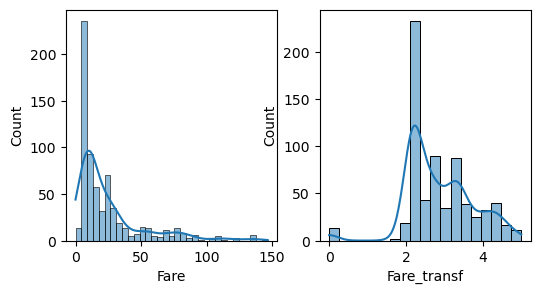

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(data = DF_train['Fare'], kde = True, ax = axes[0])
sns.histplot(data = DF_train['Fare_transf'], kde = True,  ax = axes[1])

<Axes: xlabel='Parch_transf', ylabel='Count'>

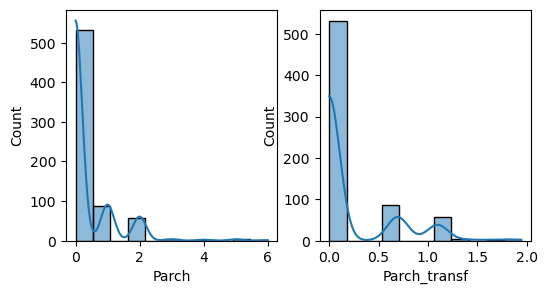

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(data=DF_train['Parch'] , kde=True , ax = axes[0])
sns.histplot(data=DF_train['Parch_transf'] , kde=True ,  ax = axes[1])

<Axes: xlabel='SibSp_transf', ylabel='Count'>

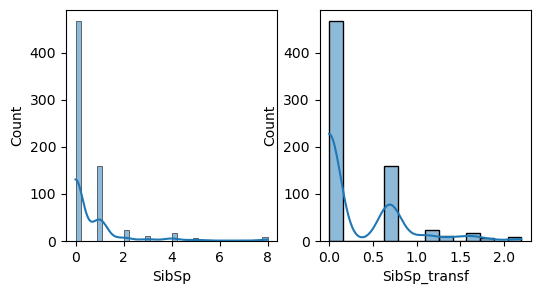

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
sns.histplot(data=DF_train['SibSp'] , kde=True , ax = axes[0])
sns.histplot(data=DF_train['SibSp_transf'] , kde=True ,  ax = axes[1])

## Transformation Pipelines

In [57]:
class OutliersTransformer(BaseEstimator, TransformerMixin):
    """
    Remove observations according to Fare since are possible outliers.
    Receive the whole DataFrame.
    Returns all DataFrama's columns but excluding the outliers.
    """
    def __init__(self, perc_threshold):
        self.perc_threshold = perc_threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        threshold = -1
        for i in range(100, 500, 50):
            obs_lost = X['Fare'].loc[X['Fare'] > i].count()
            tol_col = X['Fare'].count()
            perc_lost = obs_lost / tol_col

            if (perc_lost <= self.perc_threshold) and (threshold == -1):
                threshold = i
        
        X = X.loc[X['Fare'] <= threshold]
        return X



class WasMissingTransformer(BaseEstimator, TransformerMixin):
    """
    Create a class to add a column indicating which row with missing values.
    Receive a DataFrame and one string ColumnName.
    Returns the same DataFrame with an column added.
    """
    def __init__(self, ColumnName):
        self.ColumnName = ColumnName
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X[self.ColumnName + '_was_missing'] = X[self.ColumnName].isnull().astype(int)
        return X.drop([self.ColumnName], axis = 1)
    

    
class Log1pTransformer(BaseEstimator, TransformerMixin):
    """
    Receive a DataFrame and a list of ColumnNames.
    Return the same DataFrame with columns added.
    """
    def __init__(self, ColumnName):
        self.ColumnName = ColumnName
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for i in self.ColumnName:
            X[i + '_transf'] = X[i].apply(np.log1p)
        return X

In [58]:
from sklearn import set_config
set_config(transform_output="pandas")
#set_config(transform_output="default")


# Preprocessing for categorical data
Embarked_pipeline01 = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy = 'most_frequent'))
    ,('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


# This Pipeline work with the Training, Test and Production data.
preprocessor01 = ColumnTransformer(
    transformers=[
        ('PClass_pipeline', 'passthrough', ['Pclass'])
        ,('Sex_pipeline', OrdinalEncoder(), ['Sex'])
        ,('Age_pipeline', WasMissingTransformer('Age'), ['Age'])
        ,('Age_pipeline01', SimpleImputer(strategy='mean'), ['Age'])
        ,('Log1p_pipeline', Log1pTransformer(['SibSp', 'Parch', 'Fare']), ['SibSp', 'Parch', 'Fare'])
        ,('Embarked_pipeline', WasMissingTransformer('Embarked'), ['Embarked'])
        ,('Embarked_pipeline01', Embarked_pipeline01, ['Embarked'])
    ]
    ,verbose_feature_names_out = False
)


# This Pipeline is just for training because it removes row. That can't be done to the Test and Production data.
preprocessor = Pipeline(steps=[
    ('Fare_pipeline', OutliersTransformer(0.05))
    ,('Preprocessor01_pipeline', preprocessor01)
])

In [59]:
#X_test = X_train.copy()
#columnsToDrop = ['Cabin', 'Name', 'PassengerId', 'Ticket']
#aux01 = preprocessor01.fit_transform(X_test)

# Data for Training
X_train01_2 = preprocessor.fit_transform(X_train)

# Data for Test and Production
X_train01_3 = preprocessor01.fit_transform(X_train)

In [60]:
display(X_train.shape)
#display(X_train01.shape)
display(X_train01_2.shape)
display(X_train01_3.shape)

#display(X_train01.head())
display(X_train01_2.head())
display(X_train01_3.head())

#display(X_train01.tail())
display(X_train01_2.tail())
display(X_train01_3.tail())

(712, 11)

(686, 14)

(712, 14)

Pclass  Sex  Age_was_missing   Age  SibSp  Parch     Fare  SibSp_transf  \
331       1  1.0                0  45.5      0      0  28.5000      0.000000   
733       2  1.0                0  23.0      0      0  13.0000      0.000000   
382       3  1.0                0  32.0      0      0   7.9250      0.000000   
704       3  1.0                0  26.0      1      0   7.8542      0.693147   
813       3  0.0                0   6.0      4      2  31.2750      1.609438   

     Parch_transf  Fare_transf  Embarked_was_missing  Embarked_C  Embarked_Q  \
331      0.000000     3.384390                     0         0.0         0.0   
733      0.000000     2.639057                     0         0.0         0.0   
382      0.000000     2.188856                     0         0.0         0.0   
704      0.000000     2.180892                     0         0.0         0.0   
813      1.098612     3.474293                     0         0.0         0.0   

     Embarked_S  
331         1.0  
733         1.0  
382         1.0  
704         1.0  
813         1.0

Pclass  Sex  Age_was_missing   Age  SibSp  Parch     Fare  SibSp_transf  \
331       1  1.0                0  45.5      0      0  28.5000      0.000000   
733       2  1.0                0  23.0      0      0  13.0000      0.000000   
382       3  1.0                0  32.0      0      0   7.9250      0.000000   
704       3  1.0                0  26.0      1      0   7.8542      0.693147   
813       3  0.0                0   6.0      4      2  31.2750      1.609438   

     Parch_transf  Fare_transf  Embarked_was_missing  Embarked_C  Embarked_Q  \
331      0.000000     3.384390                     0         0.0         0.0   
733      0.000000     2.639057                     0         0.0         0.0   
382      0.000000     2.188856                     0         0.0         0.0   
704      0.000000     2.180892                     0         0.0         0.0   
813      1.098612     3.474293                     0         0.0         0.0   

     Embarked_S  
331         1.0  
733         1.0  
382         1.0  
704         1.0  
813         1.0

Pclass  Sex  Age_was_missing        Age  SibSp  Parch      Fare  \
106       3  0.0                0  21.000000      0      0    7.6500   
270       1  1.0                1  29.466947      0      0   31.0000   
860       3  1.0                0  41.000000      2      0   14.1083   
435       1  0.0                0  14.000000      1      2  120.0000   
102       1  1.0                0  21.000000      0      1   77.2875   

     SibSp_transf  Parch_transf  Fare_transf  Embarked_was_missing  \
106      0.000000      0.000000     2.157559                     0   
270      0.000000      0.000000     3.465736                     0   
860      1.098612      0.000000     2.715244                     0   
435      0.693147      1.098612     4.795791                     0   
102      0.000000      0.693147     4.360388                     0   

     Embarked_C  Embarked_Q  Embarked_S  
106         0.0         0.0         1.0  
270         0.0         0.0         1.0  
860         0.0         0.0         1.0  
435         0.0         0.0         1.0  
102         0.0         0.0         1.0

Pclass  Sex  Age_was_missing        Age  SibSp  Parch      Fare  \
106       3  0.0                0  21.000000      0      0    7.6500   
270       1  1.0                1  29.498846      0      0   31.0000   
860       3  1.0                0  41.000000      2      0   14.1083   
435       1  0.0                0  14.000000      1      2  120.0000   
102       1  1.0                0  21.000000      0      1   77.2875   

     SibSp_transf  Parch_transf  Fare_transf  Embarked_was_missing  \
106      0.000000      0.000000     2.157559                     0   
270      0.000000      0.000000     3.465736                     0   
860      1.098612      0.000000     2.715244                     0   
435      0.693147      1.098612     4.795791                     0   
102      0.000000      0.693147     4.360388                     0   

     Embarked_C  Embarked_Q  Embarked_S  
106         0.0         0.0         1.0  
270         0.0         0.0         1.0  
860         0.0         0.0         1.0  
435         0.0         0.0         1.0  
102         0.0         0.0         1.0

# Explore many different models and shortlist the best ones

In [61]:
DF_train

Pclass     Sex   Age  SibSp  Parch      Fare Embarked  Survived  \
0         1    male  45.5      0      0   28.5000        S         0   
1         2    male  23.0      0      0   13.0000        S         0   
2         3    male  32.0      0      0    7.9250        S         0   
3         3    male  26.0      1      0    7.8542        S         0   
4         3  female   6.0      4      2   31.2750        S         0   
..      ...     ...   ...    ...    ...       ...      ...       ...   
681       3  female  21.0      0      0    7.6500        S         1   
682       1    male   NaN      0      0   31.0000        S         0   
683       3    male  41.0      2      0   14.1083        S         0   
684       1  female  14.0      1      2  120.0000        S         1   
685       1    male  21.0      0      1   77.2875        S         0   

     Age_was_missing   Age_fill  Embarked_was_missing Embarked_fill  \
0                  0  45.500000                     0             S   
1                  0  23.000000                     0             S   
2                  0  32.000000                     0             S   
3                  0  26.000000                     0             S   
4                  0   6.000000                     0             S   
..               ...        ...                   ...           ...   
681                0  21.000000                     0             S   
682                1  29.466947                     0             S   
683                0  41.000000                     0             S   
684                0  14.000000                     0             S   
685                0  21.000000                     0             S   

     Embarked_C  Embarked_Q  Embarked_S  Sex_encoded  Fare_transf  \
0           0.0         0.0         1.0          1.0     3.384390   
1           0.0         0.0         1.0          1.0     2.639057   
2           0.0         0.0         1.0          1.0     2.188856   
3           0.0         0.0         1.0          1.0     2.180892   
4           0.0         0.0         1.0          0.0     3.474293   
..          ...         ...         ...          ...          ...   
681         0.0         0.0         1.0          0.0     2.157559   
682         0.0         0.0         1.0          1.0     3.465736   
683         0.0         0.0         1.0          1.0     2.715244   
684         0.0         0.0         1.0          0.0     4.795791   
685         0.0         0.0         1.0          1.0     4.360388   

     SibSp_transf  Parch_transf  
0        0.000000      0.000000  
1        0.000000      0.000000  
2        0.000000      0.000000  
3        0.693147      0.000000  
4        1.609438      1.098612  
..            ...           ...  
681      0.000000      0.000000  
682      0.000000      0.000000  
683      1.098612      0.000000  
684      0.693147      1.098612  
685      0.000000      0.693147  

[686 rows x 19 columns]

In [62]:
X_train01 = DF_train[['Pclass'
        ,'Sex_encoded'
        ,'Age_fill','Age_was_missing'
        ,'SibSp','SibSp_transf'
        ,'Parch','Parch_transf'
        ,'Fare','Fare_transf'
        , 'Embarked_C', 'Embarked_Q', 'Embarked_S','Embarked_was_missing'
       ]]
y_train01 = DF_train['Survived']

DF_train01 = X_train01.join(y_train01)

In [63]:
X_train01.describe()

Pclass  Sex_encoded    Age_fill  Age_was_missing       SibSp  \
count  686.000000   686.000000  686.000000       686.000000  686.000000   
mean     2.380466     0.667638   29.466947         0.202624    0.549563   
std      0.797531     0.471404   12.947300         0.402248    1.182485   
min      1.000000     0.000000    0.420000         0.000000    0.000000   
25%      2.000000     0.000000   22.000000         0.000000    0.000000   
50%      3.000000     1.000000   29.466947         0.000000    0.000000   
75%      3.000000     1.000000   34.375000         0.000000    1.000000   
max      3.000000     1.000000   80.000000         1.000000    8.000000   

       SibSp_transf       Parch  Parch_transf        Fare  Fare_transf  \
count    686.000000  686.000000    686.000000  686.000000   686.000000   
mean       0.288105    0.351312      0.202219   24.709347     2.862497   
std        0.477268    0.768289      0.397279   25.930764     0.869483   
min        0.000000    0.000000      0.000000    0.000000     0.000000   
25%        0.000000    0.000000      0.000000    7.895800     2.185579   
50%        0.000000    0.000000      0.000000   13.208350     2.653722   
75%        0.693147    0.000000      0.000000   27.900000     3.363842   
max        2.197225    6.000000      1.945910  146.520800     4.993969   

       Embarked_C  Embarked_Q  Embarked_S  Embarked_was_missing  
count  686.000000  686.000000  686.000000            686.000000  
mean     0.167638    0.087464    0.744898              0.002915  
std      0.373818    0.282719    0.436237              0.053955  
min      0.000000    0.000000    0.000000              0.000000  
25%      0.000000    0.000000    0.000000              0.000000  
50%      0.000000    0.000000    1.000000              0.000000  
75%      0.000000    0.000000    1.000000              0.000000  
max      1.000000    1.000000    1.000000              1.000000

## Train many models using standard parameters

In [64]:
# Logistic Regression
# It waas necessary to set a higher number of max_iter because it was having trouble converging.
MC_LogReg = LogisticRegression(random_state=42, max_iter=1000)
MC_LogReg.fit(X_train01, y_train01)
MC_LogReg_pred01 = MC_LogReg.predict(X_train01)

In [65]:
# Support Vector Machine (SVM) Classifier
# Although if the data, for example, has 10 labels, sklearn implements automatically the OvO strategy, training 45 binary classifiers.
MC_SVM = SVC(random_state=42)
MC_SVM.fit(X_train01, y_train01)
MC_SVM_pred01 = MC_SVM.predict(X_train01)

In [66]:
# Decision Tree Classifier
MC_DecTree = DecisionTreeClassifier(random_state=42)
MC_DecTree.fit(X_train01, y_train01)
MC_DecTree_pred01 = MC_DecTree.predict(X_train01)

# max_depth=2, criterion='entropy'

In [67]:
# Random Forest Classifier
MC_RanFor = RandomForestClassifier(random_state=42)
MC_RanFor.fit(X_train01, y_train01)
MC_RanFor_pred01 = MC_RanFor.predict(X_train01)

In [68]:
# Naive Bayes - GaussianNB
# For the GaussianNB model is needed to normalize the variables
MC_GauNB = GaussianNB()
MC_GauNB.fit(X_train01, y_train01)
MC_GauNB_pred01 = MC_GauNB.predict(X_train01)

In [69]:
# Naive Bayes - MultinomialNB
MC_MulNB = MultinomialNB()
MC_MulNB.fit(X_train01, y_train01)
MC_MulNB_pred01 = MC_MulNB.predict(X_train01)

In [70]:
# Naive Bayes - BernoulliNB
MC_BerNB = BernoulliNB()
MC_BerNB.fit(X_train01, y_train01)
MC_BerNB_pred01 = MC_BerNB.predict(X_train01)

In [71]:
# Stochastic Gradient Descent (SGD) Classifier
MC_SGD = SGDClassifier(random_state=42)
MC_SGD.fit(X_train01, y_train01)
MC_SGD_pred01 = MC_SGD.predict(X_train01)

In [72]:
# K-Nearest Neighbors Classifier
MC_KNN = KNeighborsClassifier()
MC_KNN.fit(X_train01, y_train01)
MC_KNN_pred01 = MC_KNN.predict(X_train01)

In [73]:
# XGBoost Classifier
MC_XGB = XGBClassifier(random_state=42)
MC_XGB.fit(X_train01, y_train01)
MC_XGB_pred01 = MC_XGB.predict(X_train01)

## Measure and compare their performance

For this project, at the section 2.2, it was declared that the main performance measure is **Accuracy**.

In [74]:
# Set a dataframe to save the performance measure for each model.
perf_measures = pd.DataFrame({'Model': [], 'Accuracy_Simple': [], 'Accuracy_CV_mean': [], 'Accuracy_CV_std': [], 'Precision': [], 'Recall': [], 'F1_score': []})
perf_measures['Model'] = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gaussian NB', 'Multinomial NB', 'Bernoulli NB', 'SGD', 'KNN', 'XGB']
perf_measures

Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
0  Logistic Regression              NaN               NaN              NaN   
1                  SVM              NaN               NaN              NaN   
2        Decision Tree              NaN               NaN              NaN   
3        Random Forest              NaN               NaN              NaN   
4          Gaussian NB              NaN               NaN              NaN   
5       Multinomial NB              NaN               NaN              NaN   
6         Bernoulli NB              NaN               NaN              NaN   
7                  SGD              NaN               NaN              NaN   
8                  KNN              NaN               NaN              NaN   
9                  XGB              NaN               NaN              NaN   

   Precision  Recall  F1_score  
0        NaN     NaN       NaN  
1        NaN     NaN       NaN  
2        NaN     NaN       NaN  
3        NaN     NaN       NaN  
4        NaN     NaN       NaN  
5        NaN     NaN       NaN  
6        NaN     NaN       NaN  
7        NaN     NaN       NaN  
8        NaN     NaN       NaN  
9        NaN     NaN       NaN

In [75]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    
    
    
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
    
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

In [76]:
def measure_performance_MC(MC, X, y, name_model, perf_measures):
    #Simple
    MC.fit(X, y)
    MC_pred = MC.predict(X)
    perf_measures.loc[perf_measures['Model'] == name_model, 'Accuracy_Simple'] = accuracy_score(y, MC_pred)
    
    # Cross-validation
    MC_pred_CV = cross_val_predict(MC, X, y, cv=5)
    MC_accuracy_CV = cross_val_score(MC, X, y, cv=5, scoring='accuracy')
    perf_measures.loc[perf_measures['Model'] == name_model, 'Accuracy_CV_mean'] = MC_accuracy_CV.mean()
    perf_measures.loc[perf_measures['Model'] == name_model, 'Accuracy_CV_std'] = MC_accuracy_CV.std()
    perf_measures.loc[perf_measures['Model'] == name_model, 'Precision'] = precision_score(y, MC_pred_CV)
    perf_measures.loc[perf_measures['Model'] == name_model, 'Recall'] = recall_score(y, MC_pred_CV)
    perf_measures.loc[perf_measures['Model'] == name_model, 'F1_score'] = f1_score(y, MC_pred_CV)
    
    # Confusion Matrix
    cm = confusion_matrix(y, MC_pred_CV)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    # View present results
    print(perf_measures.loc[perf_measures['Model'] == name_model])

                 Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
0  Logistic Regression         0.798834          0.782757         0.031013   

   Precision  Recall  F1_score  
0   0.728507   0.644  0.683652  


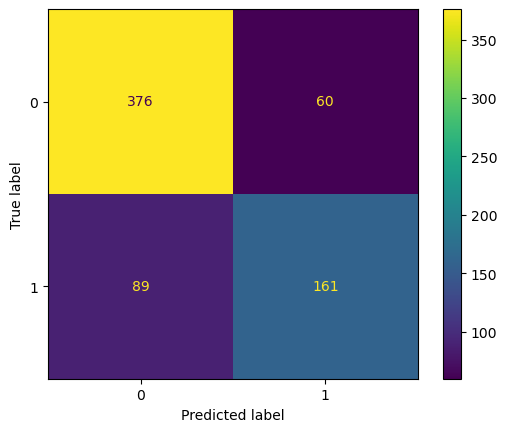

In [77]:
# Logistic Regression
measure_performance_MC(MC_LogReg, X_train01, y_train01, 'Logistic Regression', perf_measures)

  Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  Precision  \
1   SVM         0.676385          0.669068         0.025863   0.666667   

   Recall  F1_score  
1   0.184  0.288401  


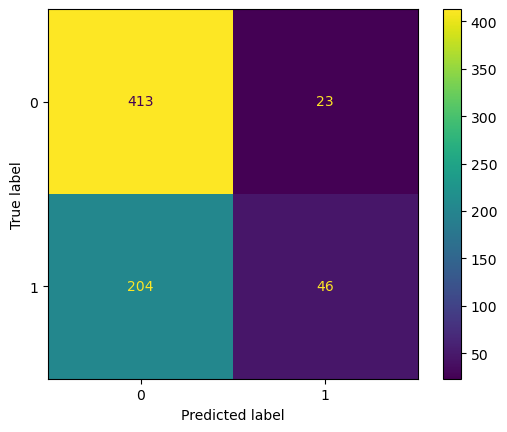

In [78]:
# Support Vector Machine (SVM) Classifier
measure_performance_MC(MC_SVM, X_train01, y_train01, 'SVM', perf_measures)

           Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
2  Decision Tree         0.979592          0.753634         0.020445   

   Precision  Recall  F1_score  
2   0.655172   0.684  0.669276  


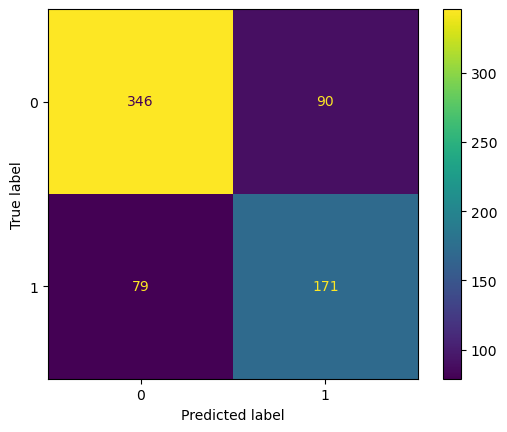

In [79]:
# Decision Tree Classifier
measure_performance_MC(MC_DecTree, X_train01, y_train01, 'Decision Tree', perf_measures)

           Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
3  Random Forest         0.979592          0.804623          0.03836   

   Precision  Recall  F1_score  
3   0.739669   0.716  0.727642  


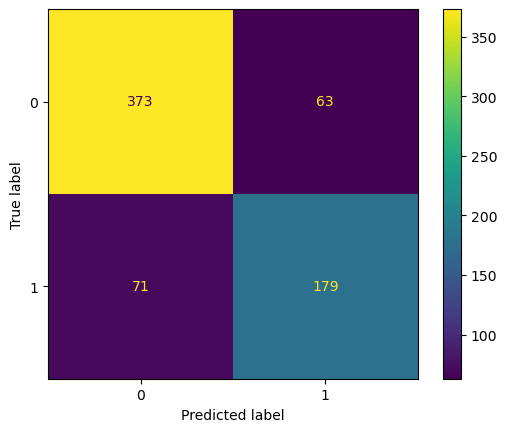

In [80]:
# Random Forest Classifier
measure_performance_MC(MC_RanFor, X_train01, y_train01, 'Random Forest', perf_measures)

         Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  Precision  \
4  Gaussian NB         0.712828          0.708442           0.0162   0.820513   

   Recall  F1_score  
4   0.256  0.390244  


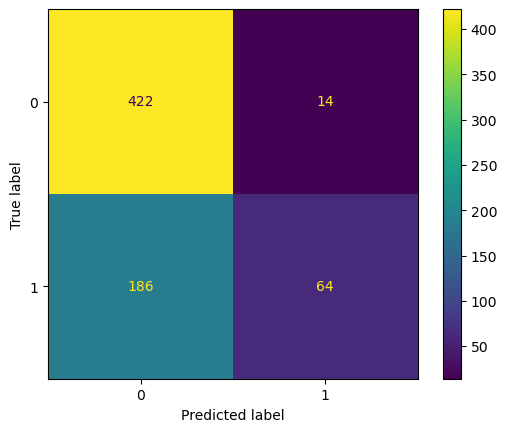

In [81]:
# Naive Bayes - GaussianNB
measure_performance_MC(MC_GauNB, X_train01, y_train01, 'Gaussian NB', perf_measures)

            Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
5  Multinomial NB         0.685131          0.683645         0.026256   

   Precision  Recall  F1_score  
5   0.580488   0.476  0.523077  


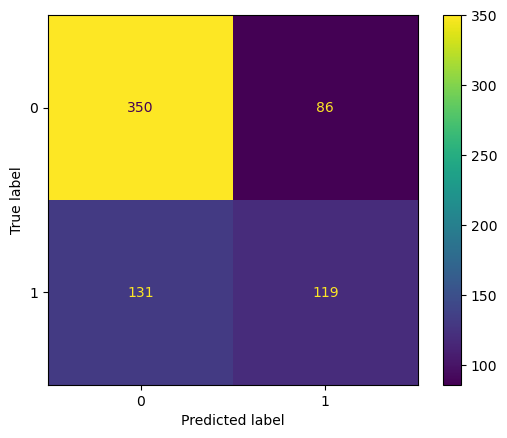

In [82]:
# Naive Bayes - MultinomialNB
measure_performance_MC(MC_MulNB, X_train01, y_train01, 'Multinomial NB', perf_measures)

          Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
6  Bernoulli NB         0.776968          0.768243          0.03293   

   Precision  Recall  F1_score  
6   0.681275   0.684  0.682635  


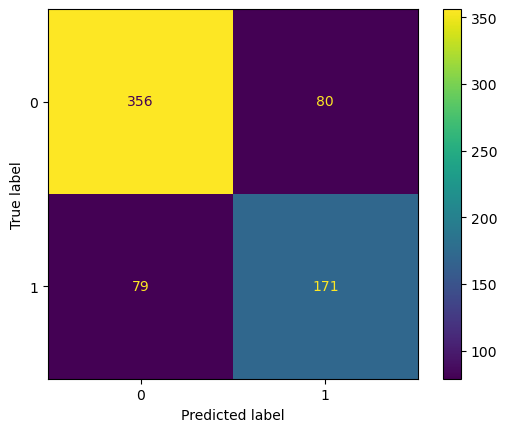

In [83]:
# Naive Bayes - BernoulliNB
measure_performance_MC(MC_BerNB, X_train01, y_train01, 'Bernoulli NB', perf_measures)

  Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  Precision  \
7   SGD         0.725948          0.666106         0.123127   0.531157   

   Recall  F1_score  
7   0.716  0.609881  


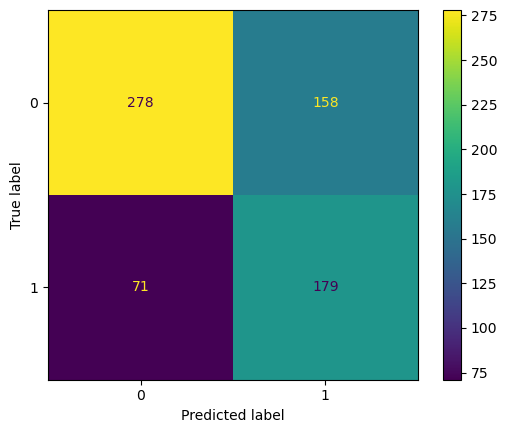

In [84]:
# Stochastic Gradient Descent (SGD) Classifier
measure_performance_MC(MC_SGD, X_train01, y_train01, 'SGD', perf_measures)

  Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  Precision  \
8   KNN         0.793003          0.689495          0.03418   0.586047   

   Recall  F1_score  
8   0.504  0.541935  


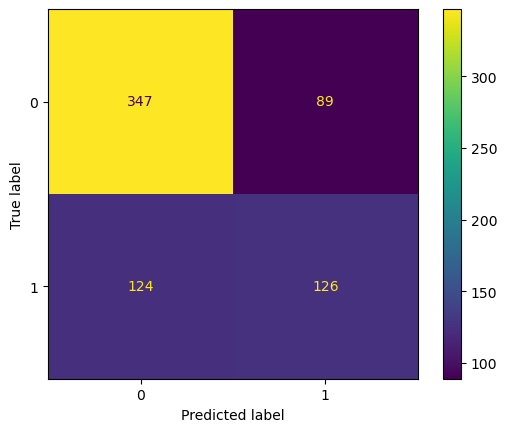

In [85]:
# K-Nearest Neighbors Classifier
measure_performance_MC(MC_KNN, X_train01, y_train01, 'KNN', perf_measures)

  Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  Precision  \
9   XGB         0.966472          0.806125          0.02713   0.742739   

   Recall  F1_score  
9   0.716  0.729124  


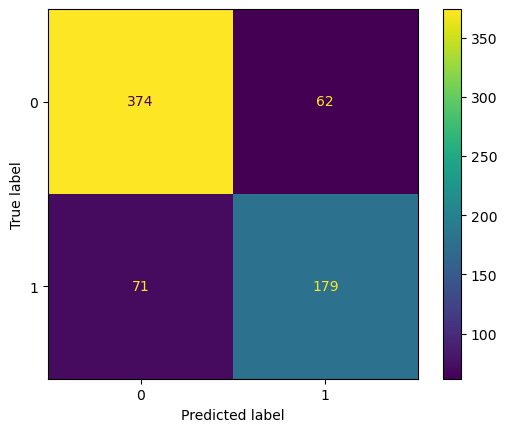

In [86]:
# XGBoost Classifier
measure_performance_MC(MC_XGB, X_train01, y_train01, 'XGB', perf_measures)

In [87]:
perf_measures.sort_values(by=['Accuracy_CV_mean'], ascending = False)

Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
9                  XGB         0.966472          0.806125         0.027130   
3        Random Forest         0.979592          0.804623         0.038360   
0  Logistic Regression         0.798834          0.782757         0.031013   
6         Bernoulli NB         0.776968          0.768243         0.032930   
2        Decision Tree         0.979592          0.753634         0.020445   
4          Gaussian NB         0.712828          0.708442         0.016200   
8                  KNN         0.793003          0.689495         0.034180   
5       Multinomial NB         0.685131          0.683645         0.026256   
1                  SVM         0.676385          0.669068         0.025863   
7                  SGD         0.725948          0.666106         0.123127   

   Precision  Recall  F1_score  
9   0.742739   0.716  0.729124  
3   0.739669   0.716  0.727642  
0   0.728507   0.644  0.683652  
6   0.681275   0.684  0.682635  
2   0.655172   0.684  0.669276  
4   0.820513   0.256  0.390244  
8   0.586047   0.504  0.541935  
5   0.580488   0.476  0.523077  
1   0.666667   0.184  0.288401  
7   0.531157   0.716  0.609881

## Analyze the most significant variables for each algorithm

In this step I will use only the three models with more Accuracy for simplicity.

### Performance Importance

In [88]:
# This new data split is just for Performance Importance, allowin gto see what variables are more relevant to the model.
X_train02, X_valid02, y_train02, y_valid02 = train_test_split(X_train01, y_train01, train_size = 0.8, random_state = 42)

In [89]:
def perImp(Model, X_train, y_train, X_valid, y_valid):
    Model.fit(X_train, y_train)
    perm = PermutationImportance(Model, random_state=42).fit(X_valid, y_valid)
    return el5.show_weights(perm, feature_names=X_valid.columns.tolist())

In [90]:
# Logistic Regression
perImp(MC_LogReg, X_train02, y_train02, X_valid02, y_valid02)

In [91]:
# Random Forest Classifier
perImp(MC_RanFor, X_train02, y_train02, X_valid02, y_valid02)

In [92]:
# XGBoost Classifier
perImp(MC_XGB, X_train02, y_train02, X_valid02, y_valid02)

Although it is recommended to remove negative features, this will be done in another iteration, mainly because it is necessary to build separate datasets for each model requirement.

### Partial Plots

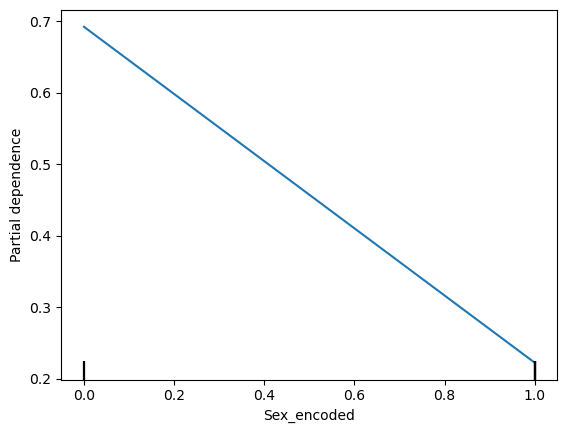

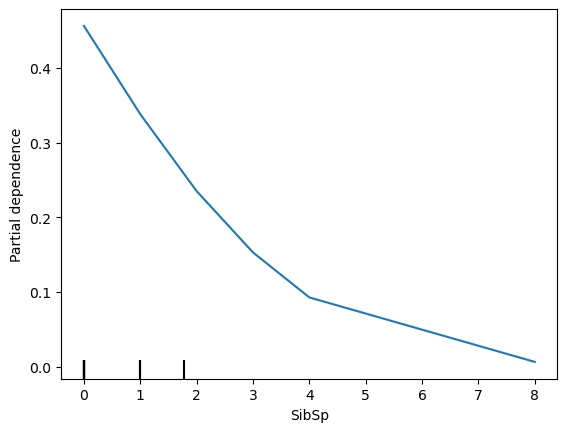

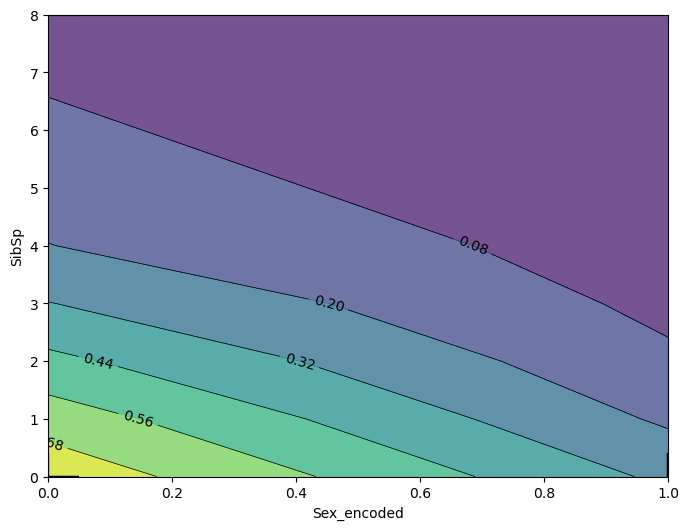

In [93]:
# Logistic Regression ###
disp1 = PartialDependenceDisplay.from_estimator(MC_LogReg, X_valid02, ['Sex_encoded'])
plt.show()

disp2 = PartialDependenceDisplay.from_estimator(MC_LogReg, X_valid02, ['SibSp'])
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Sex_encoded', 'SibSp')]
disp3 = PartialDependenceDisplay.from_estimator(MC_LogReg, X_valid02, f_names, ax=ax)
plt.show()

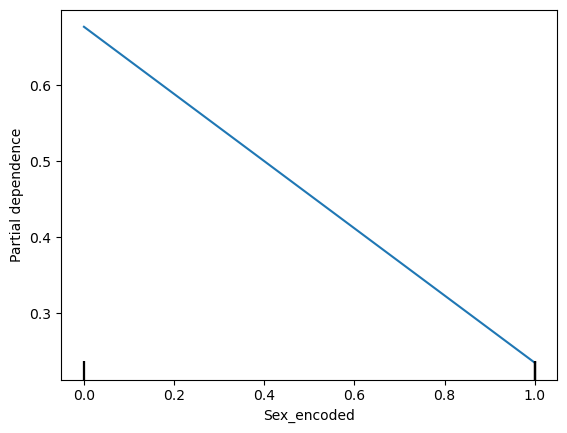

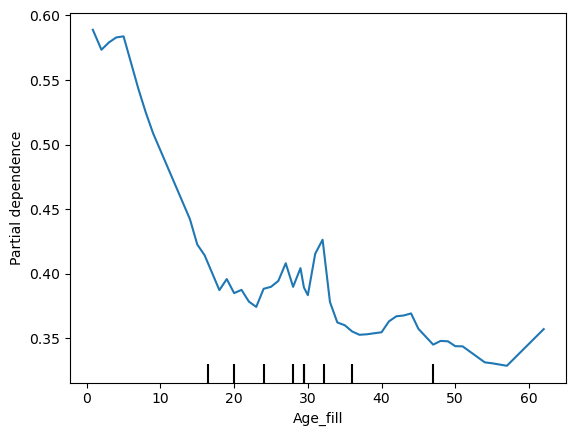

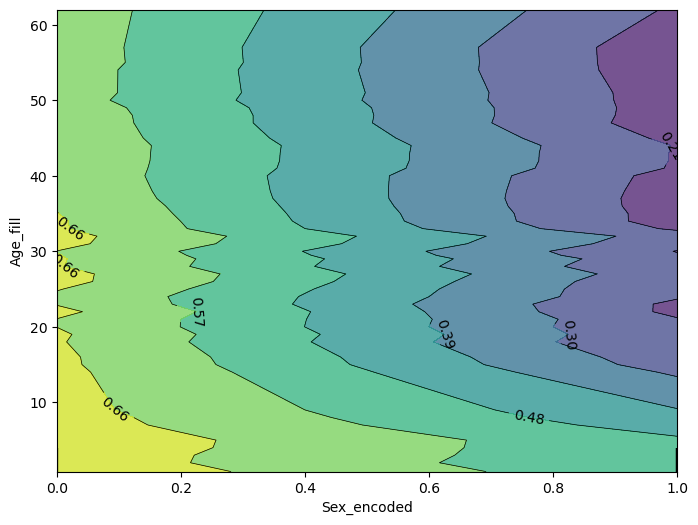

In [94]:
# Random Forest Classifier ###
disp1 = PartialDependenceDisplay.from_estimator(MC_RanFor, X_valid02, ['Sex_encoded'])
plt.show()

disp2 = PartialDependenceDisplay.from_estimator(MC_RanFor, X_valid02, ['Age_fill'])
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Sex_encoded', 'Age_fill')]
disp3 = PartialDependenceDisplay.from_estimator(MC_RanFor, X_valid02, f_names, ax=ax)
plt.show()

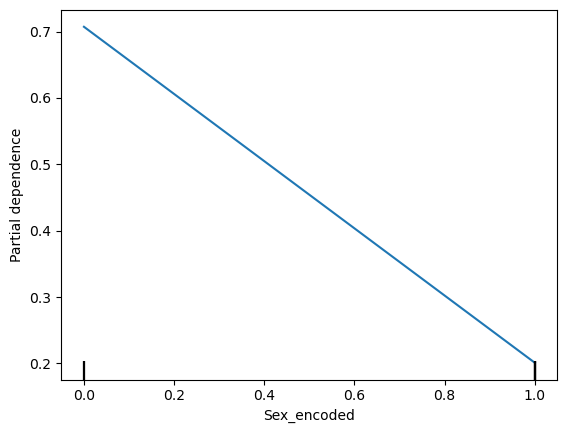

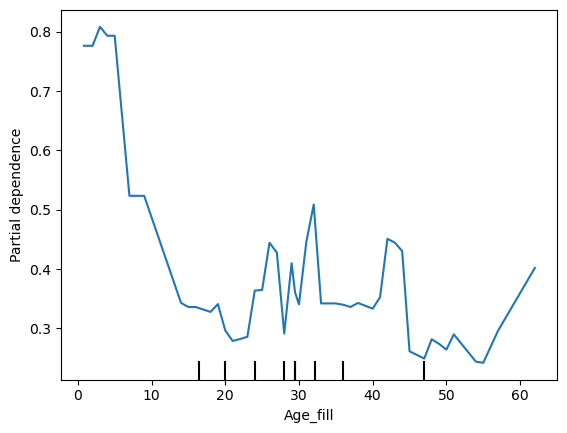

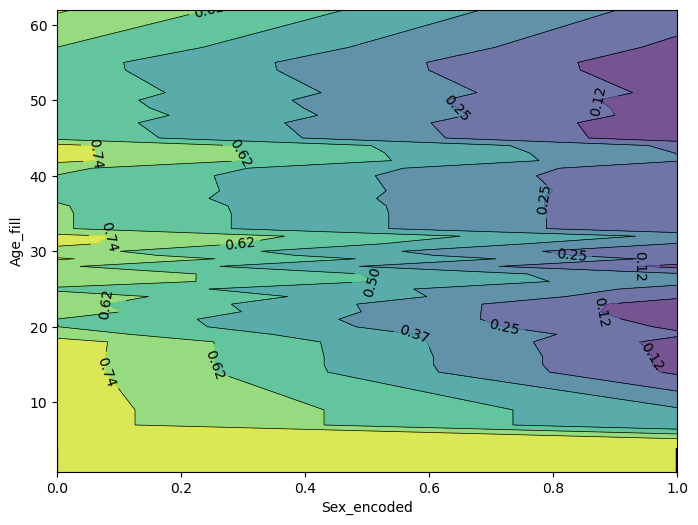

In [95]:
# XGBoost Classifier ###
disp1 = PartialDependenceDisplay.from_estimator(MC_XGB, X_valid02, ['Sex_encoded'])
plt.show()

disp2 = PartialDependenceDisplay.from_estimator(MC_XGB, X_valid02, ['Age_fill'])
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Sex_encoded', 'Age_fill')]
disp3 = PartialDependenceDisplay.from_estimator(MC_XGB, X_valid02, f_names, ax=ax)
plt.show()

### SHAP Values

In [96]:
# IT DOESN'T WORK DUE TO LIBRARY ISSUES.

# SHAP Values
#row_to_show = 5
#data_for_prediction = X_valid02.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
#explainer = shap.TreeExplainer(MC_RanFor)
#shap_values = explainer.shap_values(data_for_prediction)

# Summary Plots
#explainer = shap.TreeExplainer(MC_RanFor)
#shap_values = explainer.shap_values(X_valid02)
#shap.summary_plot(shap_values[1], X_valid02)

# Dependence Contribution Plot
#explainer = shap.TreeExplainer(MC_RanFor)
#shap_values = explainer.shap_values(X_train01)
#shap.dependence_plot('Ball Possession %', shap_values[1], X_train01, interaction_index="Sex_encoded")

### Correlation matrix and Mutual Information

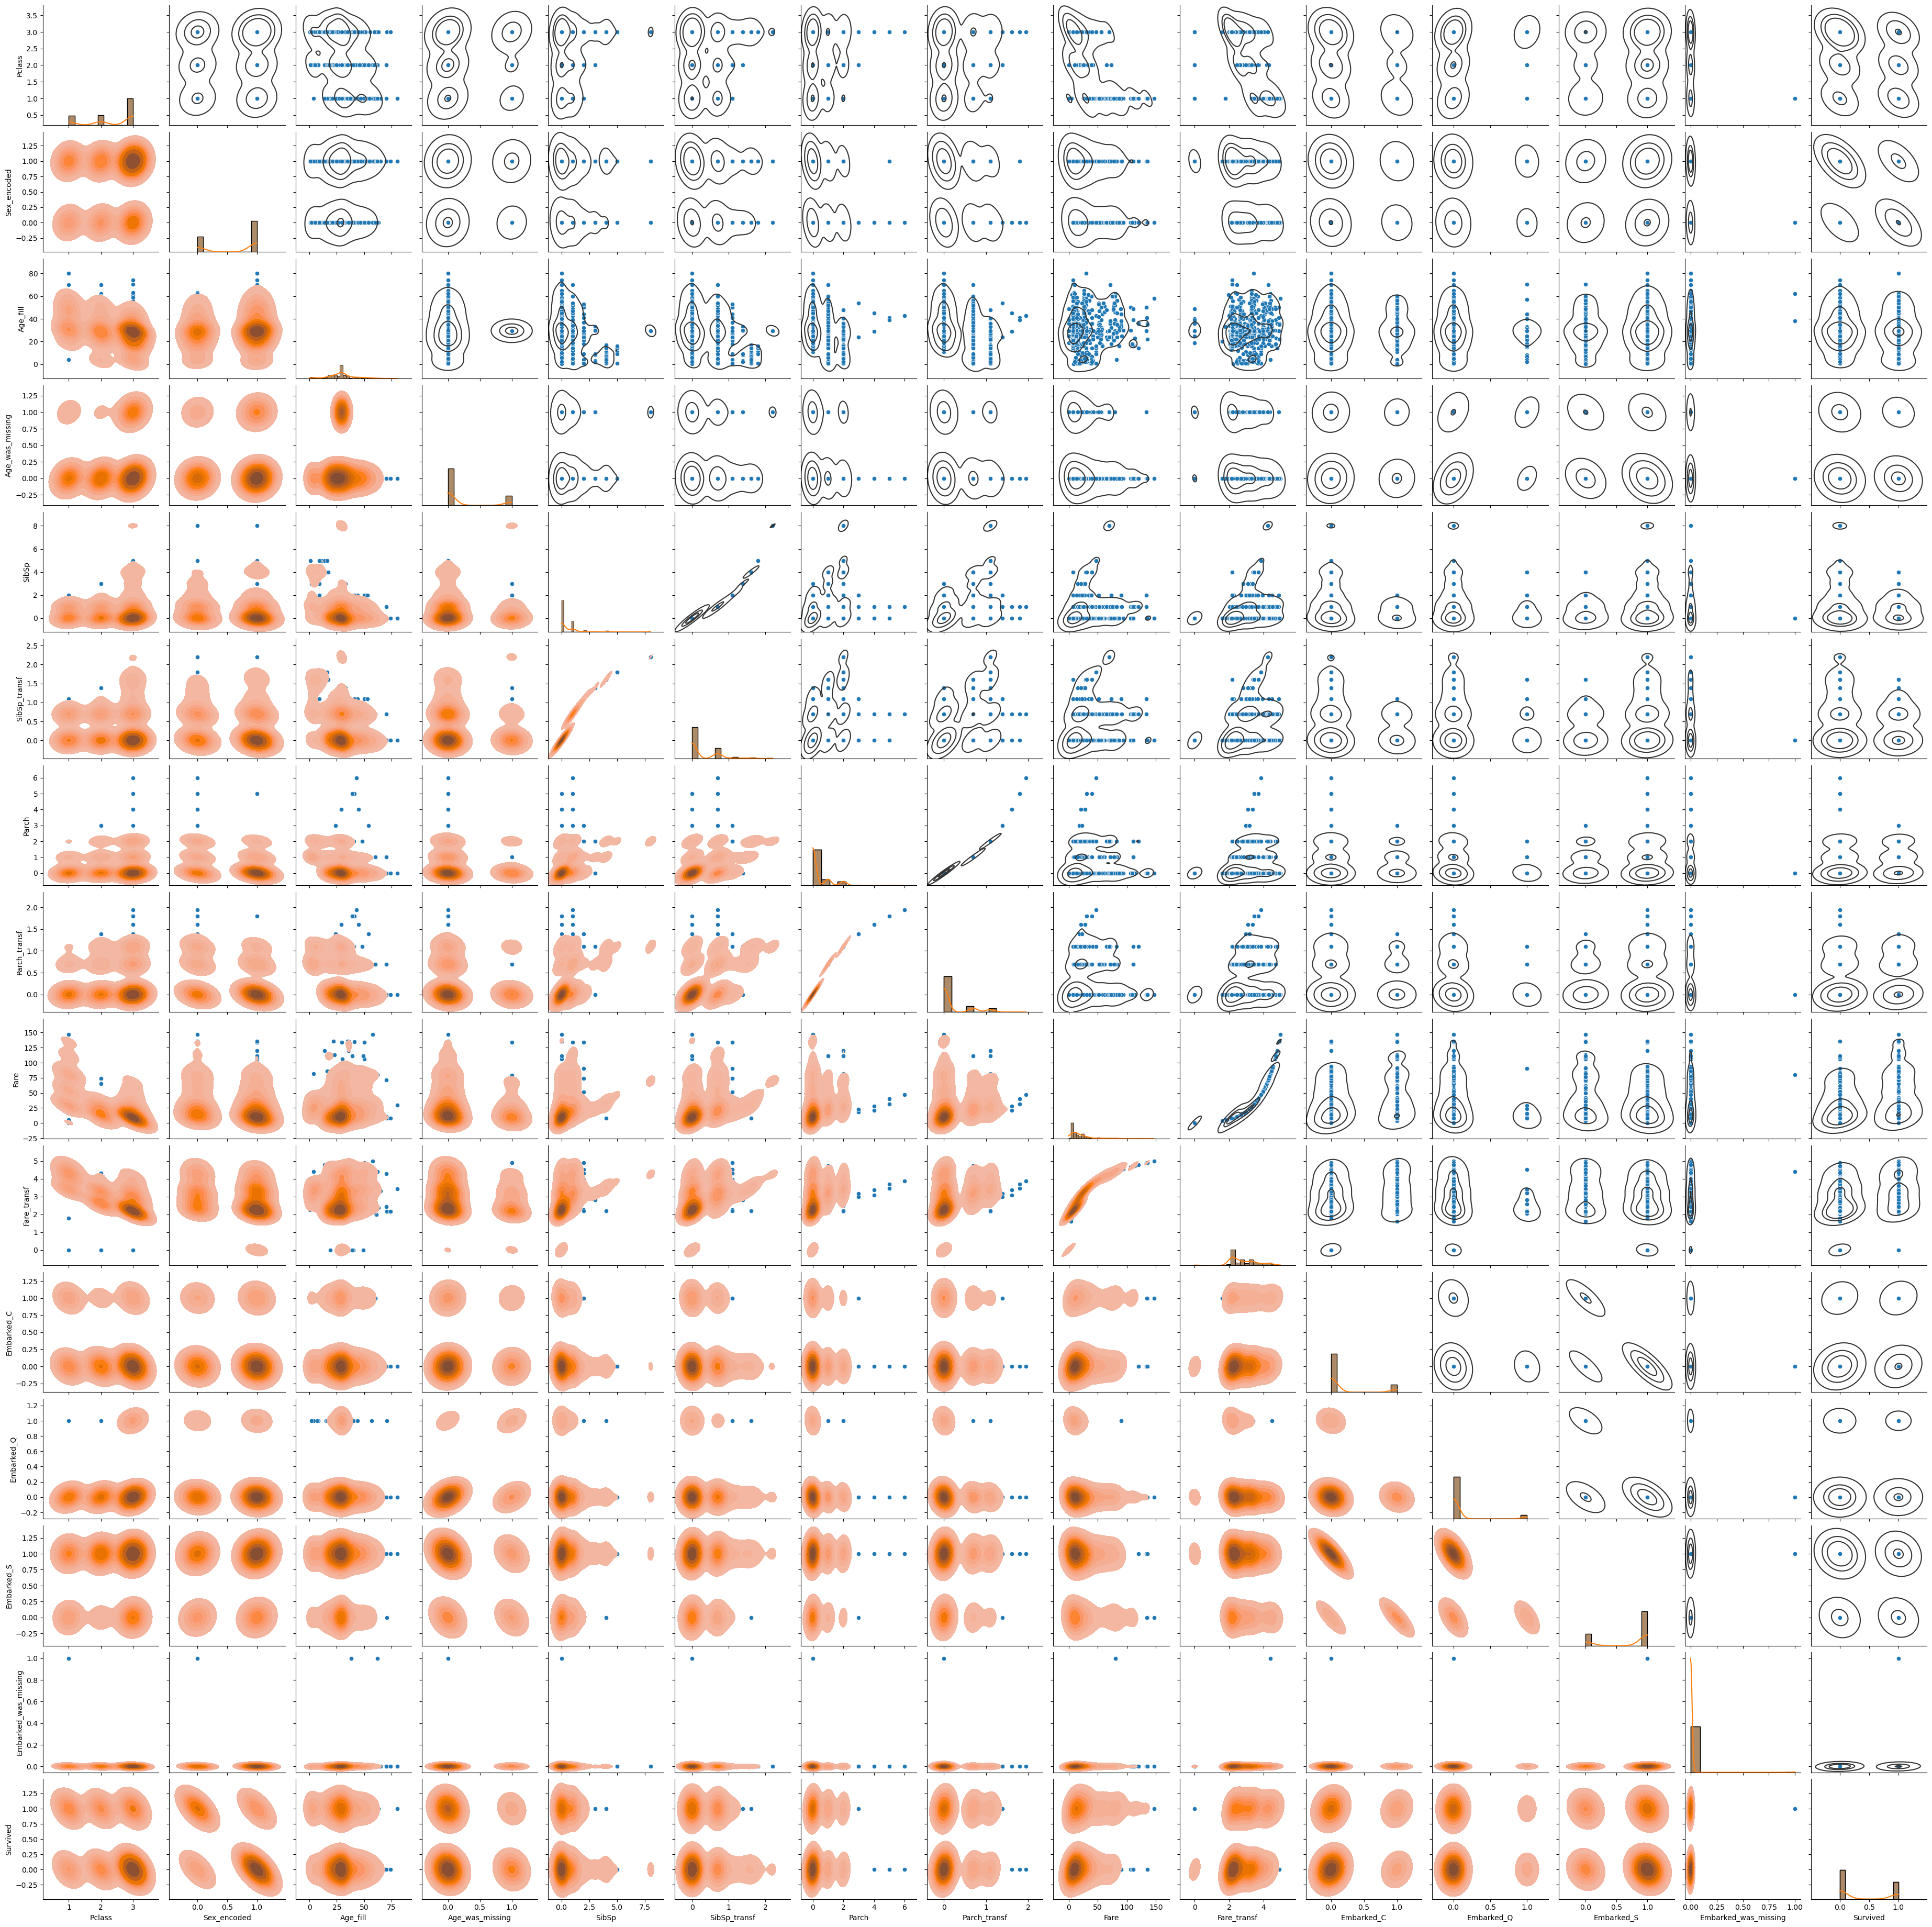

In [97]:
# Scatter and distribution plot
g = sns.pairplot(DF_train01)
g.map_lower(sns.kdeplot, fill = True)
g.map_diag(sns.histplot, kde = True)
g.map_upper(sns.kdeplot, levels=4, color=".2")

<Axes: >

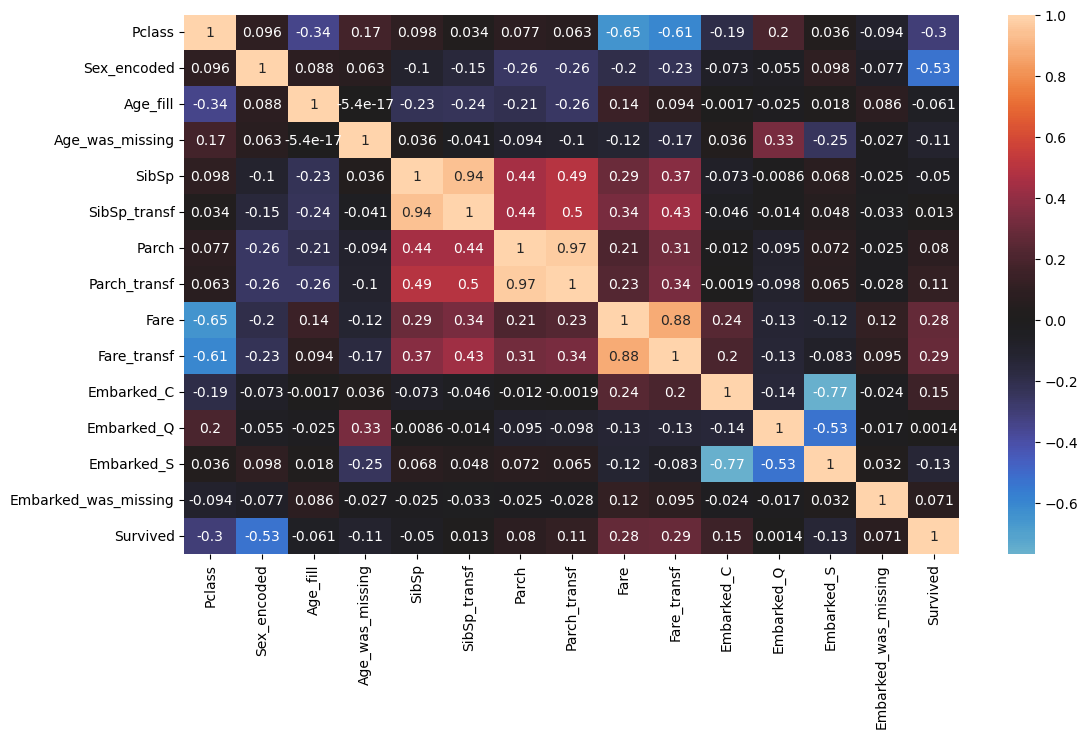

In [98]:
# Correlation Matrix
corr_matrix = DF_train01.corr()
plt.figure(figsize = (12.5 , 7))
sns.heatmap(corr_matrix, annot = True, cmap = 'icefire', center = 0.0) #coolwarm, icefire, Spectral | divergent color palettes

In [99]:
corr_matrix['Survived'].abs().sort_values(ascending=False)

Survived                1.000000
Sex_encoded             0.533109
Pclass                  0.304494
Fare_transf             0.288578
Fare                    0.279666
Embarked_C              0.154796
Embarked_S              0.133578
Age_was_missing         0.110440
Parch_transf            0.110312
Parch                   0.079584
Embarked_was_missing    0.071410
Age_fill                0.061105
SibSp                   0.049705
SibSp_transf            0.012782
Embarked_Q              0.001438
Name: Survived, dtype: float64

In [100]:
# Mutual Information
mi_scores01 = make_mi_scores(X_train01.copy(), y_train01.copy())
mi_scores01

Sex_encoded             0.127670
Fare_transf             0.091550
Fare                    0.070320
Embarked_C              0.046417
Age_was_missing         0.034010
Pclass                  0.012534
Embarked_S              0.012337
SibSp                   0.007287
Age_fill                0.006588
SibSp_transf            0.000000
Parch                   0.000000
Parch_transf            0.000000
Embarked_Q              0.000000
Embarked_was_missing    0.000000
Name: MI_scores, dtype: float64

<Axes: >

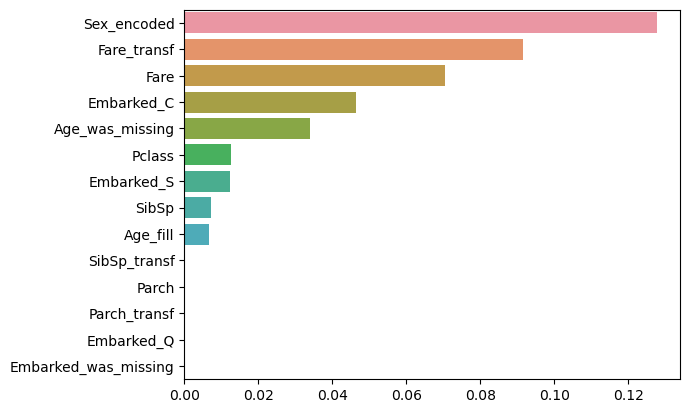

In [101]:
sns.barplot(y = mi_scores01.index, x = mi_scores01.values)

Features that have 0.0 (or are very close to) mutual information score are good candidates to be eliminated of the model. This helps avoid overfitting. This will be done in another iteration.

## Shortlist the top three or five most promising models

1. XGB
2. Random Forest
3. Logistic Regression

In [102]:
# Logistic Regression ###
#MC_LogReg
# Support Vector Machine (SVM) Classifier
#MC_SVM
# Decision Tree Classifier
#MC_DecTree
# Random Forest Classifier ###
#MC_RanFor
# Naive Bayes - GaussianNB
#MC_GauNB
# Naive Bayes - MultinomialNB
#MC_MulNB
# Naive Bayes - BernoulliNB
#MC_BerNB
# Stochastic Gradient Descent (SGD) Classifier
#MC_SGD
# K-Nearest Neighbors Classifier
#MC_KNN
# XGBoost Classifier ###
#MC_XGB

# Fine-tune your models

## Fine-tune the hyperparameters using cross-validation

In [103]:
# Random Forest Classifier ###
# RandomizedSearchCV
param_distribs = {
        'n_estimators': randint(low=50, high=200)
        ,'max_features': randint(low=1, high=4)
        ,'bootstrap':[True, False]
    }
MC_RanFor = RandomForestClassifier(random_state=42)
rnd_search_RanFor = RandomizedSearchCV(MC_RanFor, param_distributions=param_distribs,
                                n_iter=200, cv=10, scoring='accuracy', random_state=42)
rnd_search_RanFor.fit(X_train01, y_train01)

print(rnd_search_RanFor.best_params_)
print(rnd_search_RanFor.best_score_)

{'bootstrap': True, 'max_features': 3, 'n_estimators': 130}
0.8003410059676044


In [104]:
best_params_RanFor = rnd_search_RanFor.best_params_
p_range=0.02
aux02 = np.arange(np.floor(best_params_RanFor['n_estimators']*(1-p_range)), np.ceil(best_params_RanFor['n_estimators']*(1+p_range))+1).tolist()
n_estimators_range = [int(a) for a in aux02]
aux04 = np.arange(np.floor(best_params_RanFor['max_features']*(1-p_range)), np.ceil(best_params_RanFor['max_features']*(1+p_range))+1).tolist()
max_features_range = [int(a) for a in aux04]

In [105]:
# GridSearchCV
param_grid = [
    {'n_estimators':n_estimators_range
     ,'max_features':max_features_range
     ,'bootstrap':[True, False]}
]
grid_search_RanFor = GridSearchCV(MC_RanFor, param_grid, cv=10,
                          scoring='accuracy',
                          return_train_score=True)
grid_search_RanFor.fit(X_train01, y_train01)

print(grid_search_RanFor.best_params_)
print(grid_search_RanFor.best_score_)

{'bootstrap': True, 'max_features': 4, 'n_estimators': 127}
0.8017263427109974


In [106]:
# Logistic Regression ###
# RandomizedSearchCV
param_distribs = {
        'max_iter': randint(low=1000, high=10000)
        ,'C': uniform(loc=0.001, scale=1.0)
        ,'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
    }
MC_LogReg = LogisticRegression(random_state=42)
rnd_search_LogReg = RandomizedSearchCV(MC_LogReg, param_distributions=param_distribs,
                                n_iter=200, cv=10, scoring='accuracy', random_state=42)
rnd_search_LogReg.fit(X_train01, y_train01)

print(rnd_search_LogReg.best_params_)
print(rnd_search_LogReg.best_score_)

C:\Users\matia\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matia\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matia\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matia\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matia\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matia\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

{'C': 0.2549154139343447, 'max_iter': 2291, 'solver': 'liblinear'}
0.7958653026427963


In [107]:
best_params_MC_LogReg = rnd_search_LogReg.best_params_
p_range = 0.02
aux02 = np.arange(np.floor(best_params_MC_LogReg['max_iter']*(1-p_range/2)), np.ceil(best_params_MC_LogReg['max_iter']*(1+p_range/2))+1).tolist()
max_iter_range = [int(a) for a in aux02]
C_range = np.linspace(best_params_MC_LogReg['C']*(1-p_range) , best_params_MC_LogReg['C']*(1+p_range) , 5).tolist()

In [108]:
# GridSearchCV
param_grid = [
    {'max_iter':max_iter_range
     ,'C':C_range
     ,'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}
]
grid_search_LogReg = GridSearchCV(MC_LogReg, param_grid, cv=10,
                          scoring='accuracy',
                          return_train_score=True)
grid_search_LogReg.fit(X_train01, y_train01)
# 886 seconds

print(grid_search_LogReg.best_params_)
print(grid_search_LogReg.best_score_)

{'C': 0.2498171056556578, 'max_iter': 2268, 'solver': 'liblinear'}
0.7958653026427963


In [109]:
# XGBoost Classifier ###
# RandomizedSearchCV
param_distribs = {
        'n_estimators': randint(low=2, high=500) #500-8000
        ,'max_depth': randint(low=2, high=12) #2-12
        ,'learning_rate': uniform(loc=0.01, scale=1.0) #0.0001 to 1.0
    }
MC_XGB = XGBClassifier(random_state=42)
rnd_search_XGB = RandomizedSearchCV(MC_XGB, param_distributions=param_distribs,
                                n_iter=200, cv=10, scoring='accuracy', random_state=42)
rnd_search_XGB.fit(X_train01, y_train01)

print(rnd_search_XGB.best_params_)
print(rnd_search_XGB.best_score_)

{'learning_rate': 0.03058449429580245, 'max_depth': 3, 'n_estimators': 345}
0.8338874680306905


In [110]:
best_params_MC_XGB = rnd_search_XGB.best_params_
p_range = 0.02
aux02 = np.arange(np.floor(best_params_MC_XGB['n_estimators']*(1-p_range/2)), np.ceil(best_params_MC_XGB['n_estimators']*(1+p_range/2))+1).tolist()
n_estimators_range = [int(a) for a in aux02]
aux04 = np.arange(np.floor(best_params_MC_XGB['max_depth']*(1-p_range)), np.ceil(best_params_MC_XGB['max_depth']*(1+p_range))+1).tolist()
max_depth_range = [int(a) for a in aux04]
learning_rate_range = np.linspace(best_params_MC_XGB['learning_rate']*(1-p_range) , best_params_MC_XGB['learning_rate']*(1+p_range) , 5).tolist()

In [111]:
# GridSearchCV
param_grid = [
    {'n_estimators':n_estimators_range
     ,'max_depth':max_depth_range
     ,'learning_rate':learning_rate_range}
]
grid_search_XGB = GridSearchCV(MC_XGB, param_grid, cv=10,
                          scoring='accuracy',
                          return_train_score=True)
grid_search_XGB.fit(X_train01, y_train01)

print(grid_search_XGB.best_params_)
print(grid_search_XGB.best_score_)

{'learning_rate': 0.03058449429580245, 'max_depth': 3, 'n_estimators': 343}
0.8353580562659845


## Analyze the Best Model and Their Errors

In [112]:
print('Logistic Regression')
print(grid_search_LogReg.best_params_)
print(grid_search_LogReg.best_score_)

print('Random Forest Classifier')
print(grid_search_RanFor.best_params_)
print(grid_search_RanFor.best_score_)

print('XGBoost Classifier')
print(grid_search_XGB.best_params_)
print(grid_search_XGB.best_score_)

Logistic Regression
{'C': 0.2498171056556578, 'max_iter': 2268, 'solver': 'liblinear'}
0.7958653026427963
Random Forest Classifier
{'bootstrap': True, 'max_features': 4, 'n_estimators': 127}
0.8017263427109974
XGBoost Classifier
{'learning_rate': 0.03058449429580245, 'max_depth': 3, 'n_estimators': 343}
0.8353580562659845


In [113]:
perf_measures.sort_values(by=['Accuracy_CV_mean'], ascending = False)[:3]

Model  Accuracy_Simple  Accuracy_CV_mean  Accuracy_CV_std  \
9                  XGB         0.966472          0.806125         0.027130   
3        Random Forest         0.979592          0.804623         0.038360   
0  Logistic Regression         0.798834          0.782757         0.031013   

   Precision  Recall  F1_score  
9   0.742739   0.716  0.729124  
3   0.739669   0.716  0.727642  
0   0.728507   0.644  0.683652

## Evaluate Your System on the Test Set

In [125]:
final_model = grid_search_XGB.best_estimator_

X_test = X_valid.copy()
y_test = y_valid.copy()

X_test01 = preprocessor01.transform(X_test)
X_test01.rename(columns = {'Sex':'Sex_encoded', 'Age':'Age_fill'}, inplace = True)
X_test01 = X_test01[X_train01.columns].copy()

pred_test01 = final_model.predict(X_test01)

accuracy_score(y_test, pred_test01)

0.8044692737430168

In [154]:
X_train01.columns

Index(['Pclass', 'Sex_encoded', 'Age_fill', 'Age_was_missing', 'SibSp',
       'SibSp_transf', 'Parch', 'Parch_transf', 'Fare', 'Fare_transf',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_was_missing'],
      dtype='object')

# Launch, monitor and maintain your system

In [129]:
jbl.dump(final_model, 'titanic_model.pkl')

#final_model_reloaded = jbl.load('titanic_model.pkl')
#final_model_reloaded.predict(new_data)

['titanic_model.pkl']

In [ ]:
#pickle.dump(model, open('solubility_model.pkl', 'wb'))
#load_model = pickle.load(open('solubility_model.pkl', 'rb'))
#prediction = load_model.predict(X)

# Predictions

In [153]:
# Data for new predictions. It is not a test set for the model trained.
DF_new = pd.read_csv("C:\\Users\\matia\\OneDrive\\Documentos\\Study\\Scripts\\01_Classification_Titanic\\titanic\\test.csv", header = 0)

display(DF_new.shape)
display(DF_new.head())
display(DF_new.columns)

(418, 11)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
X_new01 = preprocessor01.transform(DF_new)
X_new01.rename(columns = {'Sex':'Sex_encoded', 'Age':'Age_fill'}, inplace = True)
X_new01 = X_new01[X_train01.columns].copy()

pred_new01 = final_model.predict(X_new01)
pred_new01 = pd.DataFrame({'Survived':pred_new01})

In [152]:
DF_pred = pd.concat([DF_new, pred_new01], axis=1, ignore_index=False, names=[DF_new.columns, pred_new01.columns])
DF_pred

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     Survived  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
413         0  
414         1  
415         0  
416         0  
417         0  

[418 rows x 12 columns]